# Green AI Image Classification: Initial Algorithm

Green AI Image Classification: the Initial Algorithm  is a compact, memory-savvy “Green AI” pipeline built around on-disk, chunked image loading and real-time carbon logging via the CodeCarbon library. It scans the UC Merced folder structure for .tif images, encodes labels, then trains two models sequentially: a large baseline CNN (higher filters, float32) and a compact micro CNN (fewer filters, float16) to compare accuracy vs. carbon/memory footprint. The key runtime techniques are streaming chunks of image paths (DATA_CHUNK_SIZE) into memory, explicit garbage collection and psutil-based memory logs, float16 image arrays to shrink RAM, and short epoch counts to limit compute. Training runs call EmissionsTracker to measure kgCO₂e, and evaluation is limited (MAX_EVAL_SAMPLES) with standard classification plots (accuracy bar, confusion matrix, ROC/PR curves). 

The design prioritizes low memory footprint and an apples-to-apples carbon comparison between a heavier baseline and an optimized small model, trading I/O overhead for reduced peak memory and measured emissions.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 5.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
tokenizers 0.21.2 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 1.0.0rc2 which is incompatible.
gradio 5.38.1 requires pydantic<2.12,>=2.0, but you have pydantic 2.12.0a1 which is incompatible.
google-genai 1.27.0 requires httpx<1.0

2025-10-27 14:17:46.311268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761574666.541874      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761574666.602609      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



[MEMORY LOG @ Pipeline Start] RSS: 0.784 GB
Scanning directory for images at: /kaggle/input/uc-merced-land-use-dataset/UCMerced_LandUse/Images...


Extracting Labels from Paths: 100%|██████████| 2100/2100 [00:00<00:00, 897771.73it/s]

Total data paths found: 2100
Train samples: 1470, Validation samples: 315, Test samples: 315

[MEMORY LOG @ Pre-GC After Data Split] RSS: 0.786 GB



[MEMORY LOG @ Post-GC After Data Split] RSS: 0.786 GB


Loading Chunk (315 items): 100%|██████████| 315/315 [00:03<00:00, 99.04it/s] 



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 0.795 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 0.795 GB


Loading Chunk (315 items): 100%|██████████| 315/315 [00:02<00:00, 129.72it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 0.803 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 0.803 GB
Validation data shape: (315, 64, 64, 3), Test data shape: (315, 64, 64, 3)


#####################################################################
## STAGE 1: BASELINE (HIGHER CARBON/MEMORY FOOTPRINT) ##
#####################################################################

[MODEL BUILD] Building Larger CNN (Baseline Model)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-27 14:18:06.037565: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 21)             │        10,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,674,773 (36.91 MB)

 Trainable params: 9,674,773 (36.91 MB)

 Non-trainable params: 0 (0.00 B)

[codecarbon WARNING @ 14:18:06] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 14:18:06] [setup] RAM Tracking...
[codecarbon INFO @ 14:18:06] [setup] CPU Tracking...
[codecarbon WARNING @ 14:18:07] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 14:18:07] CPU Model on constant consumption mode: AMD EPYC 7B12
[codecarbon WARNING @ 14:18:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:18:07] [setup] GPU Tracking...
[codecarbon INFO @ 14:18:07] No GPU found.
[codecarbon INFO @ 14:18:07] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 14:18:07] >>> Tracker's m


--- Starting Training for BASELINE_CNN (Epochs: 10, Batch: 32) ---

--- Starting Real-Time Carbon Tracker: BASELINE_CNN ---

[EPOCH 1/10]


Epoch 1 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 1 Chunk Start] RSS: 0.842 GB

[MEMORY LOG @ Post-GC Epoch 1 Chunk Start] RSS: 0.842 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:04<00:00, 115.27it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 0.870 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 0.870 GB

[MEMORY LOG @ Epoch 1 Chunk End] RSS: 1.249 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Cleanup] RSS: 1.227 GB


Epoch 1 Chunks:  33%|███▎      | 1/3 [00:12<00:24, 12.33s/it]


[MEMORY LOG @ Post-GC Epoch 1 Chunk Cleanup] RSS: 1.227 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Start] RSS: 1.227 GB

[MEMORY LOG @ Post-GC Epoch 1 Chunk Start] RSS: 1.227 GB



Loading Chunk (500 items):  48%|████▊     | 240/500 [00:02<00:02, 110.12it/s][codecarbon INFO @ 14:18:25] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:18:25] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:18:25] Energy consumed for All CPU : 0.000500 kWh
[codecarbon INFO @ 14:18:25] 0.000542 kWh of electricity used since the beginning.

Loading Chunk (500 items): 100%|██████████| 500/500 [00:04<00:00, 116.27it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.236 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.236 GB

[MEMORY LOG @ Epoch 1 Chunk End] RSS: 1.306 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Cleanup] RSS: 1.228 GB


Epoch 1 Chunks:  67%|██████▋   | 2/3 [00:21<00:10, 10.45s/it]


[MEMORY LOG @ Post-GC Epoch 1 Chunk Cleanup] RSS: 1.228 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Start] RSS: 1.228 GB

[MEMORY LOG @ Post-GC Epoch 1 Chunk Start] RSS: 1.228 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:04<00:00, 96.24it/s] 



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.267 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.267 GB


[codecarbon INFO @ 14:18:40] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:18:40] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:18:40] Energy consumed for All CPU : 0.001000 kWh
[codecarbon INFO @ 14:18:40] 0.001084 kWh of electricity used since the beginning.



[MEMORY LOG @ Epoch 1 Chunk End] RSS: 1.323 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Cleanup] RSS: 1.235 GB



[MEMORY LOG @ Post-GC Epoch 1 Chunk Cleanup] RSS: 1.235 GB


Validation Accuracy: 0.1048 | Validation Loss: 2.8710

[EPOCH 2/10]


Epoch 2 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 2 Chunk Start] RSS: 1.281 GB

[MEMORY LOG @ Post-GC Epoch 2 Chunk Start] RSS: 1.281 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 719.25it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.281 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.281 GB

[MEMORY LOG @ Epoch 2 Chunk End] RSS: 1.342 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Cleanup] RSS: 1.249 GB


Epoch 2 Chunks:  33%|███▎      | 1/3 [00:05<00:10,  5.32s/it]


[MEMORY LOG @ Post-GC Epoch 2 Chunk Cleanup] RSS: 1.249 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Start] RSS: 1.249 GB

[MEMORY LOG @ Post-GC Epoch 2 Chunk Start] RSS: 1.249 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 705.90it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.292 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.292 GB

[MEMORY LOG @ Epoch 2 Chunk End] RSS: 1.351 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Cleanup] RSS: 1.351 GB


Epoch 2 Chunks:  67%|██████▋   | 2/3 [00:10<00:05,  5.37s/it]


[MEMORY LOG @ Post-GC Epoch 2 Chunk Cleanup] RSS: 1.351 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Start] RSS: 1.351 GB

[MEMORY LOG @ Post-GC Epoch 2 Chunk Start] RSS: 1.351 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 576.80it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.351 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.351 GB


[codecarbon INFO @ 14:18:55] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:18:55] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:18:55] Energy consumed for All CPU : 0.001500 kWh
[codecarbon INFO @ 14:18:55] 0.001625 kWh of electricity used since the beginning.



[MEMORY LOG @ Epoch 2 Chunk End] RSS: 1.310 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Cleanup] RSS: 1.310 GB



[MEMORY LOG @ Post-GC Epoch 2 Chunk Cleanup] RSS: 1.310 GB


Validation Accuracy: 0.2254 | Validation Loss: 2.4786

[EPOCH 3/10]


Epoch 3 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 3 Chunk Start] RSS: 1.313 GB

[MEMORY LOG @ Post-GC Epoch 3 Chunk Start] RSS: 1.313 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 597.37it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.313 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.313 GB

[MEMORY LOG @ Epoch 3 Chunk End] RSS: 1.340 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Cleanup] RSS: 1.274 GB


Epoch 3 Chunks:  33%|███▎      | 1/3 [00:05<00:11,  5.51s/it]


[MEMORY LOG @ Post-GC Epoch 3 Chunk Cleanup] RSS: 1.274 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Start] RSS: 1.274 GB

[MEMORY LOG @ Post-GC Epoch 3 Chunk Start] RSS: 1.274 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 625.24it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.317 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.317 GB


[codecarbon INFO @ 14:19:10] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:19:10] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:19:10] Energy consumed for All CPU : 0.002000 kWh
[codecarbon INFO @ 14:19:10] 0.002167 kWh of electricity used since the beginning.



[MEMORY LOG @ Epoch 3 Chunk End] RSS: 1.369 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Cleanup] RSS: 1.276 GB


Epoch 3 Chunks:  67%|██████▋   | 2/3 [00:12<00:06,  6.29s/it]


[MEMORY LOG @ Post-GC Epoch 3 Chunk Cleanup] RSS: 1.276 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Start] RSS: 1.276 GB

[MEMORY LOG @ Post-GC Epoch 3 Chunk Start] RSS: 1.276 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 525.52it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.316 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.316 GB

[MEMORY LOG @ Epoch 3 Chunk End] RSS: 1.386 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Cleanup] RSS: 1.386 GB



[MEMORY LOG @ Post-GC Epoch 3 Chunk Cleanup] RSS: 1.386 GB


Validation Accuracy: 0.2825 | Validation Loss: 2.2092

[EPOCH 4/10]


Epoch 4 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 4 Chunk Start] RSS: 1.388 GB

[MEMORY LOG @ Post-GC Epoch 4 Chunk Start] RSS: 1.388 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 537.45it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.388 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.388 GB

[MEMORY LOG @ Epoch 4 Chunk End] RSS: 1.395 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Cleanup] RSS: 1.395 GB


Epoch 4 Chunks:  33%|███▎      | 1/3 [00:05<00:11,  5.53s/it]


[MEMORY LOG @ Post-GC Epoch 4 Chunk Cleanup] RSS: 1.395 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Start] RSS: 1.395 GB

[MEMORY LOG @ Post-GC Epoch 4 Chunk Start] RSS: 1.395 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 658.39it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.395 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.395 GB


[codecarbon INFO @ 14:19:25] Energy consumed for RAM : 0.000208 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:19:25] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:19:25] Energy consumed for All CPU : 0.002500 kWh
[codecarbon INFO @ 14:19:25] 0.002708 kWh of electricity used since the beginning.



[MEMORY LOG @ Epoch 4 Chunk End] RSS: 1.401 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Cleanup] RSS: 1.401 GB


Epoch 4 Chunks:  67%|██████▋   | 2/3 [00:10<00:05,  5.46s/it]


[MEMORY LOG @ Post-GC Epoch 4 Chunk Cleanup] RSS: 1.401 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Start] RSS: 1.401 GB

[MEMORY LOG @ Post-GC Epoch 4 Chunk Start] RSS: 1.401 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 485.82it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.401 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.401 GB

[MEMORY LOG @ Epoch 4 Chunk End] RSS: 1.399 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Cleanup] RSS: 1.399 GB



[MEMORY LOG @ Post-GC Epoch 4 Chunk Cleanup] RSS: 1.399 GB


Validation Accuracy: 0.3968 | Validation Loss: 2.0724

[EPOCH 5/10]


Epoch 5 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 5 Chunk Start] RSS: 1.399 GB

[MEMORY LOG @ Post-GC Epoch 5 Chunk Start] RSS: 1.399 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 636.57it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.399 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.399 GB

[MEMORY LOG @ Epoch 5 Chunk End] RSS: 1.456 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Cleanup] RSS: 1.456 GB


Epoch 5 Chunks:  33%|███▎      | 1/3 [00:05<00:11,  5.53s/it]


[MEMORY LOG @ Post-GC Epoch 5 Chunk Cleanup] RSS: 1.456 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Start] RSS: 1.456 GB

[MEMORY LOG @ Post-GC Epoch 5 Chunk Start] RSS: 1.456 GB



Loading Chunk (500 items):  65%|██████▌   | 325/500 [00:00<00:00, 559.24it/s][codecarbon INFO @ 14:19:40] Energy consumed for RAM : 0.000250 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:19:40] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:19:40] Energy consumed for All CPU : 0.003000 kWh
[codecarbon INFO @ 14:19:40] 0.003250 kWh of electricity used since the beginning.

Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 501.65it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.456 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.456 GB

[MEMORY LOG @ Epoch 5 Chunk End] RSS: 1.351 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Cleanup] RSS: 1.351 GB


Epoch 5 Chunks:  67%|██████▋   | 2/3 [00:11<00:05,  5.61s/it]


[MEMORY LOG @ Post-GC Epoch 5 Chunk Cleanup] RSS: 1.351 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Start] RSS: 1.351 GB

[MEMORY LOG @ Post-GC Epoch 5 Chunk Start] RSS: 1.351 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 696.10it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.351 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.351 GB

[MEMORY LOG @ Epoch 5 Chunk End] RSS: 1.401 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Cleanup] RSS: 1.401 GB



[MEMORY LOG @ Post-GC Epoch 5 Chunk Cleanup] RSS: 1.401 GB


Validation Accuracy: 0.4095 | Validation Loss: 1.9105

[EPOCH 6/10]


Epoch 6 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 6 Chunk Start] RSS: 1.401 GB

[MEMORY LOG @ Post-GC Epoch 6 Chunk Start] RSS: 1.401 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 529.69it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.401 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.401 GB


[codecarbon INFO @ 14:19:55] Energy consumed for RAM : 0.000292 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:19:55] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:19:55] Energy consumed for All CPU : 0.003500 kWh
[codecarbon INFO @ 14:19:55] 0.003792 kWh of electricity used since the beginning.



[MEMORY LOG @ Epoch 6 Chunk End] RSS: 1.404 GB

[MEMORY LOG @ Pre-GC Epoch 6 Chunk Cleanup] RSS: 1.404 GB


Epoch 6 Chunks:  33%|███▎      | 1/3 [00:07<00:14,  7.00s/it]


[MEMORY LOG @ Post-GC Epoch 6 Chunk Cleanup] RSS: 1.404 GB

[MEMORY LOG @ Pre-GC Epoch 6 Chunk Start] RSS: 1.404 GB

[MEMORY LOG @ Post-GC Epoch 6 Chunk Start] RSS: 1.404 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 532.78it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.404 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.404 GB

[MEMORY LOG @ Epoch 6 Chunk End] RSS: 1.404 GB

[MEMORY LOG @ Pre-GC Epoch 6 Chunk Cleanup] RSS: 1.404 GB


Epoch 6 Chunks:  67%|██████▋   | 2/3 [00:12<00:06,  6.14s/it]


[MEMORY LOG @ Post-GC Epoch 6 Chunk Cleanup] RSS: 1.404 GB

[MEMORY LOG @ Pre-GC Epoch 6 Chunk Start] RSS: 1.404 GB

[MEMORY LOG @ Post-GC Epoch 6 Chunk Start] RSS: 1.404 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 561.76it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.404 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.404 GB

[MEMORY LOG @ Epoch 6 Chunk End] RSS: 1.408 GB

[MEMORY LOG @ Pre-GC Epoch 6 Chunk Cleanup] RSS: 1.408 GB



[MEMORY LOG @ Post-GC Epoch 6 Chunk Cleanup] RSS: 1.408 GB


[codecarbon INFO @ 14:20:10] Energy consumed for RAM : 0.000333 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:20:10] Delta energy consumed for CPU with constant : 0.000500 kWh, power : 120.0 W
[codecarbon INFO @ 14:20:10] Energy consumed for All CPU : 0.004000 kWh
[codecarbon INFO @ 14:20:10] 0.004333 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:20:10] 0.010307 g.CO2eq/s mean an estimation of 325.0524801078393 kg.CO2eq/year


Validation Accuracy: 0.4540 | Validation Loss: 1.7504

[EPOCH 7/10]


Epoch 7 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 7 Chunk Start] RSS: 1.408 GB

[MEMORY LOG @ Post-GC Epoch 7 Chunk Start] RSS: 1.408 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 726.63it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.408 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.408 GB

[MEMORY LOG @ Epoch 7 Chunk End] RSS: 1.411 GB

[MEMORY LOG @ Pre-GC Epoch 7 Chunk Cleanup] RSS: 1.411 GB


Epoch 7 Chunks:  33%|███▎      | 1/3 [00:05<00:10,  5.38s/it]


[MEMORY LOG @ Post-GC Epoch 7 Chunk Cleanup] RSS: 1.411 GB

[MEMORY LOG @ Pre-GC Epoch 7 Chunk Start] RSS: 1.411 GB

[MEMORY LOG @ Post-GC Epoch 7 Chunk Start] RSS: 1.411 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 620.70it/s]



[MEMORY LOG @ Pre-GC After Chunk Load] RSS: 1.411 GB

[MEMORY LOG @ Post-GC After Chunk Load] RSS: 1.411 GB

[MEMORY LOG @ Epoch 7 Chunk End] RSS: 1.412 GB

[MEMORY LOG @ Pre-GC Epoch 7 Chunk Cleanup] RSS: 1.412 GB


Epoch 7 Chunks:  67%|██████▋   | 2/3 [00:10<00:05,  5.46s/it]


[MEMORY LOG @ Post-GC Epoch 7 Chunk Cleanup] RSS: 1.412 GB

[MEMORY LOG @ Pre-GC Epoch 7 Chunk Start] RSS: 1.412 GB

[MEMORY LOG @ Post-GC Epoch 7 Chunk Start] RSS: 1.412 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 17723.90it/s]


[MEMORY LOG @ Pre-GC Epoch 7 Chunk Cleanup] RSS: 1.412 GB



[MEMORY LOG @ Post-GC Epoch 7 Chunk Cleanup] RSS: 1.413 GB


Validation Accuracy: 0.4762 | Validation Loss: 1.9049

[EPOCH 8/10]


Epoch 8 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 8 Chunk Start] RSS: 1.413 GB

[MEMORY LOG @ Post-GC Epoch 8 Chunk Start] RSS: 1.413 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18450.94it/s]


[MEMORY LOG @ Pre-GC Epoch 8 Chunk Cleanup] RSS: 1.413 GB



Epoch 8 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.67it/s]


[MEMORY LOG @ Post-GC Epoch 8 Chunk Cleanup] RSS: 1.413 GB

[MEMORY LOG @ Pre-GC Epoch 8 Chunk Start] RSS: 1.413 GB

[MEMORY LOG @ Post-GC Epoch 8 Chunk Start] RSS: 1.413 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 17167.40it/s]


[MEMORY LOG @ Pre-GC Epoch 8 Chunk Cleanup] RSS: 1.413 GB



Epoch 8 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.65it/s]


[MEMORY LOG @ Post-GC Epoch 8 Chunk Cleanup] RSS: 1.413 GB

[MEMORY LOG @ Pre-GC Epoch 8 Chunk Start] RSS: 1.413 GB

[MEMORY LOG @ Post-GC Epoch 8 Chunk Start] RSS: 1.413 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 18070.61it/s]


[MEMORY LOG @ Pre-GC Epoch 8 Chunk Cleanup] RSS: 1.413 GB



[MEMORY LOG @ Post-GC Epoch 8 Chunk Cleanup] RSS: 1.413 GB


Validation Accuracy: 0.4762 | Validation Loss: 1.9049

[EPOCH 9/10]


Epoch 9 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 9 Chunk Start] RSS: 1.414 GB

[MEMORY LOG @ Post-GC Epoch 9 Chunk Start] RSS: 1.414 GB



Loading Chunk (500 items):   0%|          | 0/500 [00:00<?, ?it/s][codecarbon INFO @ 14:20:25] Energy consumed for RAM : 0.000375 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:20:25] Delta energy consumed for CPU with constant : 0.000501 kWh, power : 120.0 W
[codecarbon INFO @ 14:20:25] Energy consumed for All CPU : 0.004501 kWh
[codecarbon INFO @ 14:20:25] 0.004875 kWh of electricity used since the beginning.
Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 11473.01it/s]


[MEMORY LOG @ Pre-GC Epoch 9 Chunk Cleanup] RSS: 1.414 GB



Epoch 9 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.62it/s]


[MEMORY LOG @ Post-GC Epoch 9 Chunk Cleanup] RSS: 1.414 GB

[MEMORY LOG @ Pre-GC Epoch 9 Chunk Start] RSS: 1.414 GB

[MEMORY LOG @ Post-GC Epoch 9 Chunk Start] RSS: 1.414 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 14566.39it/s]


[MEMORY LOG @ Pre-GC Epoch 9 Chunk Cleanup] RSS: 1.414 GB



Epoch 9 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.62it/s]


[MEMORY LOG @ Post-GC Epoch 9 Chunk Cleanup] RSS: 1.414 GB

[MEMORY LOG @ Pre-GC Epoch 9 Chunk Start] RSS: 1.414 GB

[MEMORY LOG @ Post-GC Epoch 9 Chunk Start] RSS: 1.414 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 18783.81it/s]


[MEMORY LOG @ Pre-GC Epoch 9 Chunk Cleanup] RSS: 1.414 GB



[MEMORY LOG @ Post-GC Epoch 9 Chunk Cleanup] RSS: 1.414 GB


Validation Accuracy: 0.4762 | Validation Loss: 1.9049

[EPOCH 10/10]


Epoch 10 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 10 Chunk Start] RSS: 1.414 GB

[MEMORY LOG @ Post-GC Epoch 10 Chunk Start] RSS: 1.414 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18636.22it/s]


[MEMORY LOG @ Pre-GC Epoch 10 Chunk Cleanup] RSS: 1.414 GB



Epoch 10 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.63it/s]


[MEMORY LOG @ Post-GC Epoch 10 Chunk Cleanup] RSS: 1.414 GB

[MEMORY LOG @ Pre-GC Epoch 10 Chunk Start] RSS: 1.414 GB

[MEMORY LOG @ Post-GC Epoch 10 Chunk Start] RSS: 1.414 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18329.51it/s]


[MEMORY LOG @ Pre-GC Epoch 10 Chunk Cleanup] RSS: 1.414 GB



Epoch 10 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.62it/s]


[MEMORY LOG @ Post-GC Epoch 10 Chunk Cleanup] RSS: 1.414 GB

[MEMORY LOG @ Pre-GC Epoch 10 Chunk Start] RSS: 1.414 GB

[MEMORY LOG @ Post-GC Epoch 10 Chunk Start] RSS: 1.414 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 17659.12it/s]


[MEMORY LOG @ Pre-GC Epoch 10 Chunk Cleanup] RSS: 1.414 GB



[MEMORY LOG @ Post-GC Epoch 10 Chunk Cleanup] RSS: 1.414 GB


[codecarbon INFO @ 14:20:30] Energy consumed for RAM : 0.000388 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:20:30] Delta energy consumed for CPU with constant : 0.000155 kWh, power : 120.0 W
[codecarbon INFO @ 14:20:30] Energy consumed for All CPU : 0.004655 kWh
[codecarbon INFO @ 14:20:30] 0.005043 kWh of electricity used since the beginning.


Validation Accuracy: 0.4762 | Validation Loss: 1.9049

--- REAL-TIME CARBON TRACKING SUMMARY ---
Model: BASELINE_CNN
Total Samples Trained: 9820
REAL Carbon Emission: 0.001440 kgCO2e
----------------------------------------


--- Starting Full Evaluation: Baseline Model ---
[Baseline Model] Macro-F1 Score: 0.4768
[Baseline Model] Overall Accuracy: 0.5016


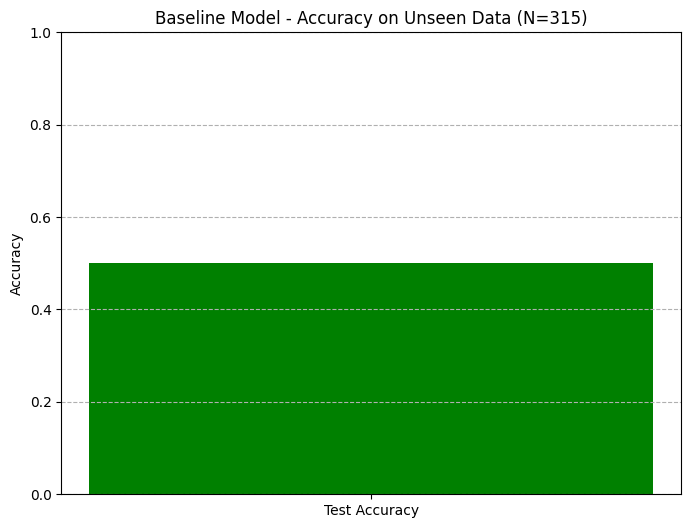

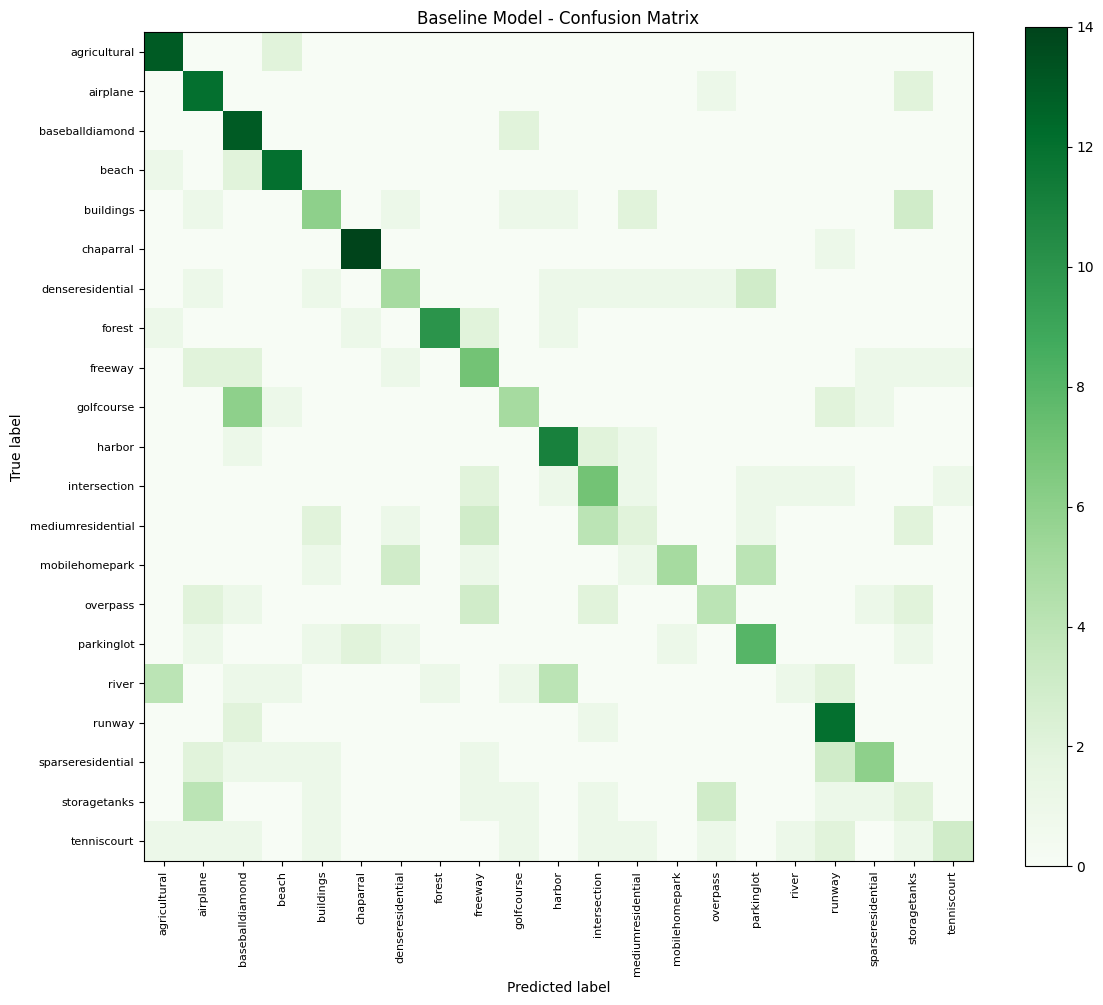

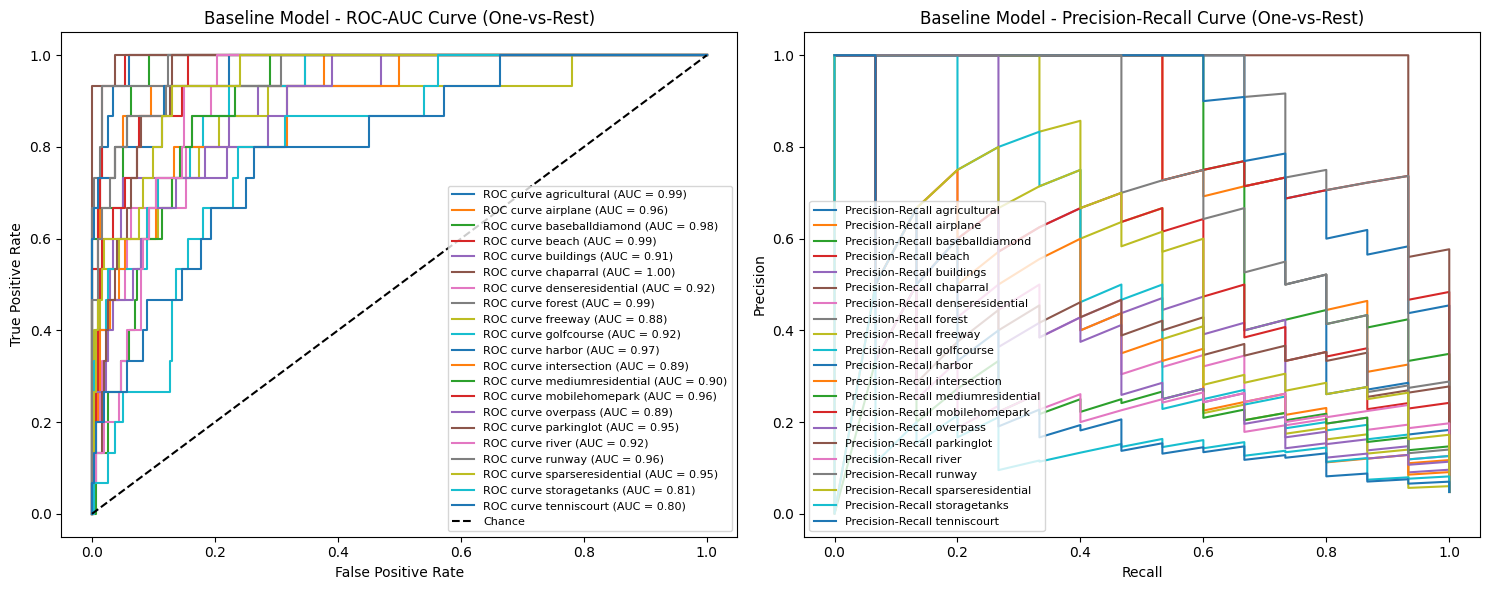

--- Evaluation Complete: Baseline Model ---

[MEMORY LOG @ Pre-GC After Baseline Cleanup] RSS: 1.420 GB

[MEMORY LOG @ Post-GC After Baseline Cleanup] RSS: 1.420 GB


#####################################################################
## STAGE 2: GREEN AI (MEMORY/CARBON OPTIMIZED) ##
#####################################################################

[MODEL BUILD] Building Micro CNN (Green AI Model)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,653 (811.14 KB)

 Trainable params: 207,653 (811.14 KB)

 Non-trainable params: 0 (0.00 B)

[codecarbon WARNING @ 14:20:33] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 14:20:33] [setup] RAM Tracking...
[codecarbon INFO @ 14:20:33] [setup] CPU Tracking...
[codecarbon WARNING @ 14:20:34] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 14:20:34] CPU Model on constant consumption mode: AMD EPYC 7B12
[codecarbon WARNING @ 14:20:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 14:20:34] [setup] GPU Tracking...
[codecarbon INFO @ 14:20:34] No GPU found.
[codecarbon INFO @ 14:20:34] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 14:20:34] >>> Tracker's m


--- Starting Training for GREEN_AI_MICRO_CNN (Epochs: 5, Batch: 32) ---

--- Starting Real-Time Carbon Tracker: GREEN_AI_MICRO_CNN ---

[EPOCH 1/5]


Epoch 1 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 1 Chunk Start] RSS: 1.421 GB

[MEMORY LOG @ Post-GC Epoch 1 Chunk Start] RSS: 1.421 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18552.79it/s]


[MEMORY LOG @ Pre-GC Epoch 1 Chunk Cleanup] RSS: 1.421 GB



Epoch 1 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.77it/s]


[MEMORY LOG @ Post-GC Epoch 1 Chunk Cleanup] RSS: 1.421 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Start] RSS: 1.421 GB

[MEMORY LOG @ Post-GC Epoch 1 Chunk Start] RSS: 1.421 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18697.69it/s]


[MEMORY LOG @ Pre-GC Epoch 1 Chunk Cleanup] RSS: 1.421 GB



Epoch 1 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.75it/s]


[MEMORY LOG @ Post-GC Epoch 1 Chunk Cleanup] RSS: 1.421 GB

[MEMORY LOG @ Pre-GC Epoch 1 Chunk Start] RSS: 1.421 GB

[MEMORY LOG @ Post-GC Epoch 1 Chunk Start] RSS: 1.421 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 14759.72it/s]


[MEMORY LOG @ Pre-GC Epoch 1 Chunk Cleanup] RSS: 1.421 GB



[MEMORY LOG @ Post-GC Epoch 1 Chunk Cleanup] RSS: 1.421 GB


Validation Accuracy: 0.0476 | Validation Loss: 3.0898

[EPOCH 2/5]


Epoch 2 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 2 Chunk Start] RSS: 1.422 GB

[MEMORY LOG @ Post-GC Epoch 2 Chunk Start] RSS: 1.422 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 16166.76it/s]


[MEMORY LOG @ Pre-GC Epoch 2 Chunk Cleanup] RSS: 1.422 GB



Epoch 2 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.64it/s]


[MEMORY LOG @ Post-GC Epoch 2 Chunk Cleanup] RSS: 1.422 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Start] RSS: 1.422 GB

[MEMORY LOG @ Post-GC Epoch 2 Chunk Start] RSS: 1.422 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 17348.47it/s]


[MEMORY LOG @ Pre-GC Epoch 2 Chunk Cleanup] RSS: 1.422 GB



Epoch 2 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.66it/s]


[MEMORY LOG @ Post-GC Epoch 2 Chunk Cleanup] RSS: 1.422 GB

[MEMORY LOG @ Pre-GC Epoch 2 Chunk Start] RSS: 1.422 GB

[MEMORY LOG @ Post-GC Epoch 2 Chunk Start] RSS: 1.422 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 17438.24it/s]


[MEMORY LOG @ Pre-GC Epoch 2 Chunk Cleanup] RSS: 1.422 GB



[MEMORY LOG @ Post-GC Epoch 2 Chunk Cleanup] RSS: 1.422 GB


Validation Accuracy: 0.0476 | Validation Loss: 3.0898

[EPOCH 3/5]


Epoch 3 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 3 Chunk Start] RSS: 1.422 GB

[MEMORY LOG @ Post-GC Epoch 3 Chunk Start] RSS: 1.422 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18249.91it/s]


[MEMORY LOG @ Pre-GC Epoch 3 Chunk Cleanup] RSS: 1.422 GB



Epoch 3 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.65it/s]


[MEMORY LOG @ Post-GC Epoch 3 Chunk Cleanup] RSS: 1.422 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Start] RSS: 1.422 GB

[MEMORY LOG @ Post-GC Epoch 3 Chunk Start] RSS: 1.422 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18174.63it/s]


[MEMORY LOG @ Pre-GC Epoch 3 Chunk Cleanup] RSS: 1.422 GB



Epoch 3 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.67it/s]


[MEMORY LOG @ Post-GC Epoch 3 Chunk Cleanup] RSS: 1.422 GB

[MEMORY LOG @ Pre-GC Epoch 3 Chunk Start] RSS: 1.422 GB

[MEMORY LOG @ Post-GC Epoch 3 Chunk Start] RSS: 1.422 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 11529.42it/s]


[MEMORY LOG @ Pre-GC Epoch 3 Chunk Cleanup] RSS: 1.422 GB



[MEMORY LOG @ Post-GC Epoch 3 Chunk Cleanup] RSS: 1.422 GB
Validation Accuracy: 0.0476 | Validation Loss: 3.0898

[EPOCH 4/5]


Epoch 4 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 4 Chunk Start] RSS: 1.425 GB

[MEMORY LOG @ Post-GC Epoch 4 Chunk Start] RSS: 1.425 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18147.42it/s]


[MEMORY LOG @ Pre-GC Epoch 4 Chunk Cleanup] RSS: 1.425 GB



Epoch 4 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.75it/s]


[MEMORY LOG @ Post-GC Epoch 4 Chunk Cleanup] RSS: 1.425 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Start] RSS: 1.425 GB

[MEMORY LOG @ Post-GC Epoch 4 Chunk Start] RSS: 1.425 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18204.29it/s]


[MEMORY LOG @ Pre-GC Epoch 4 Chunk Cleanup] RSS: 1.425 GB



Epoch 4 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.71it/s]


[MEMORY LOG @ Post-GC Epoch 4 Chunk Cleanup] RSS: 1.425 GB

[MEMORY LOG @ Pre-GC Epoch 4 Chunk Start] RSS: 1.425 GB

[MEMORY LOG @ Post-GC Epoch 4 Chunk Start] RSS: 1.425 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 18391.78it/s]


[MEMORY LOG @ Pre-GC Epoch 4 Chunk Cleanup] RSS: 1.425 GB



[MEMORY LOG @ Post-GC Epoch 4 Chunk Cleanup] RSS: 1.425 GB
Validation Accuracy: 0.0476 | Validation Loss: 3.0898

[EPOCH 5/5]


Epoch 5 Chunks:   0%|          | 0/3 [00:00<?, ?it/s]


[MEMORY LOG @ Pre-GC Epoch 5 Chunk Start] RSS: 1.425 GB

[MEMORY LOG @ Post-GC Epoch 5 Chunk Start] RSS: 1.425 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 15057.85it/s]


[MEMORY LOG @ Pre-GC Epoch 5 Chunk Cleanup] RSS: 1.425 GB



Epoch 5 Chunks:  33%|███▎      | 1/3 [00:00<00:01,  1.57it/s]


[MEMORY LOG @ Post-GC Epoch 5 Chunk Cleanup] RSS: 1.425 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Start] RSS: 1.425 GB

[MEMORY LOG @ Post-GC Epoch 5 Chunk Start] RSS: 1.425 GB



Loading Chunk (500 items): 100%|██████████| 500/500 [00:00<00:00, 18366.10it/s]


[MEMORY LOG @ Pre-GC Epoch 5 Chunk Cleanup] RSS: 1.425 GB



Epoch 5 Chunks:  67%|██████▋   | 2/3 [00:01<00:00,  1.62it/s]


[MEMORY LOG @ Post-GC Epoch 5 Chunk Cleanup] RSS: 1.425 GB

[MEMORY LOG @ Pre-GC Epoch 5 Chunk Start] RSS: 1.425 GB

[MEMORY LOG @ Post-GC Epoch 5 Chunk Start] RSS: 1.425 GB



Loading Chunk (470 items): 100%|██████████| 470/470 [00:00<00:00, 18928.82it/s]


[MEMORY LOG @ Pre-GC Epoch 5 Chunk Cleanup] RSS: 1.425 GB



[codecarbon INFO @ 14:20:47] Energy consumed for RAM : 0.000029 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 14:20:47] Delta energy consumed for CPU with constant : 0.000344 kWh, power : 120.0 W
[codecarbon INFO @ 14:20:47] Energy consumed for All CPU : 0.000344 kWh
[codecarbon INFO @ 14:20:47] 0.000372 kWh of electricity used since the beginning.



[MEMORY LOG @ Post-GC Epoch 5 Chunk Cleanup] RSS: 1.425 GB
Validation Accuracy: 0.0476 | Validation Loss: 3.0898

--- REAL-TIME CARBON TRACKING SUMMARY ---
Model: GREEN_AI_MICRO_CNN
Total Samples Trained: 0
REAL Carbon Emission: 0.000106 kgCO2e
----------------------------------------


--- Starting Full Evaluation: Green AI Model ---
[Green AI Model] Macro-F1 Score: 0.0041
[Green AI Model] Overall Accuracy: 0.0444


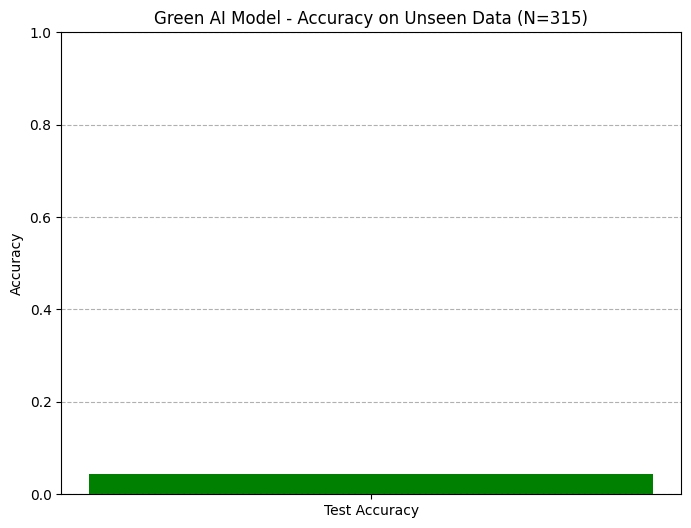

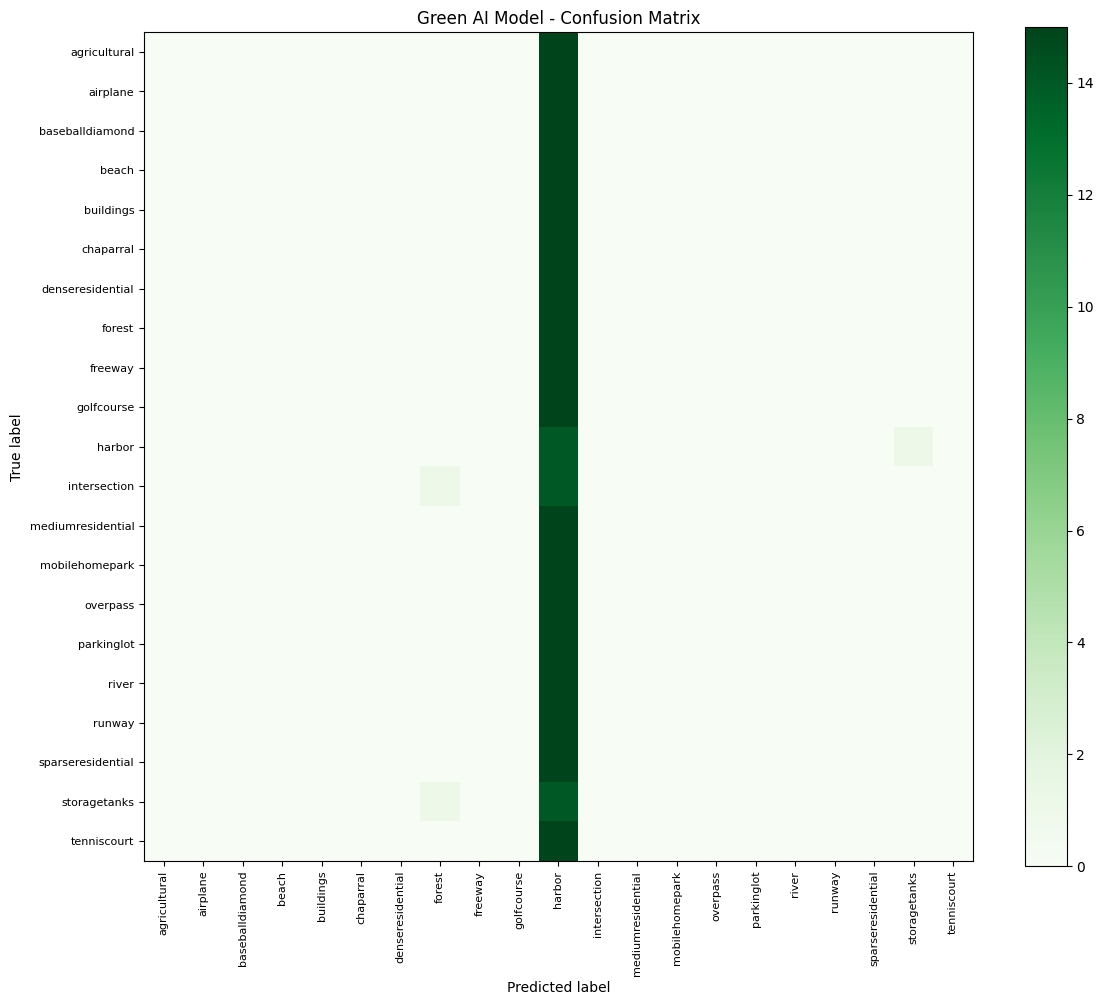

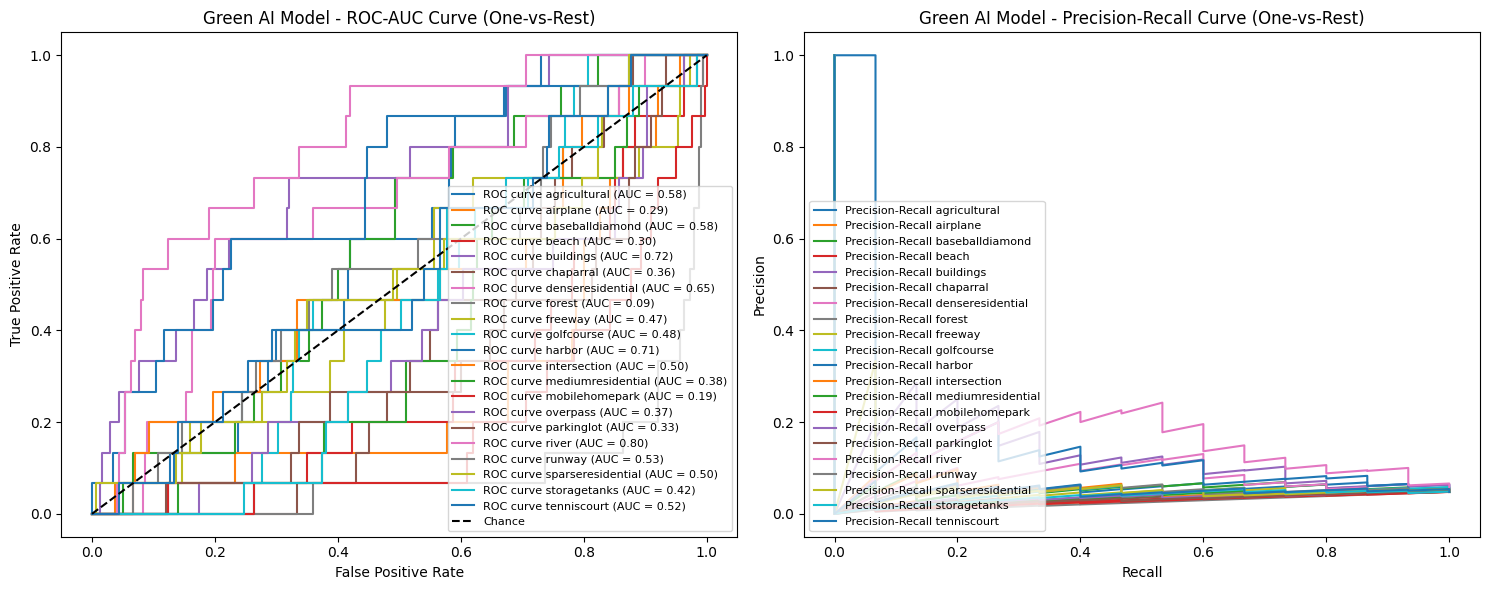

--- Evaluation Complete: Green AI Model ---


#####################################################################
## STAGE 3: GREEN AI DELTAS (BEFORE/AFTER) ##
#####################################################################
Carbon Baseline (kgCO2e): 0.001440
Carbon Green AI (kgCO2e): 0.000106
Carbon Reduction Delta: 0.001334 kgCO2e (92.62% reduction)


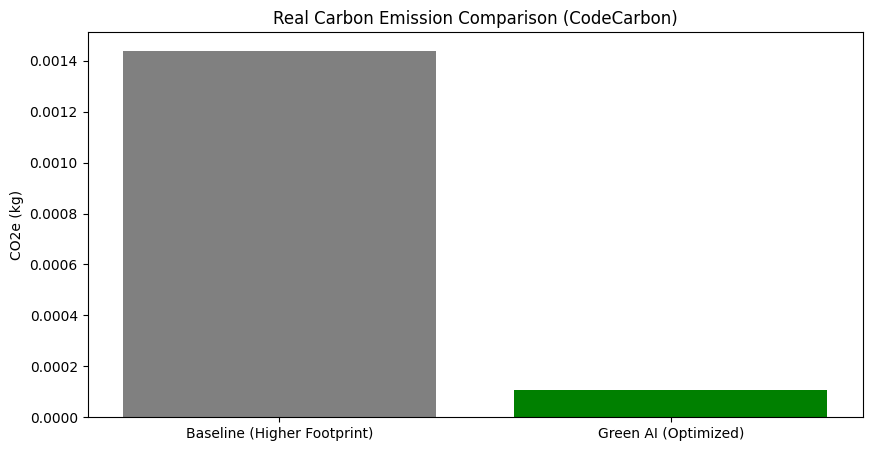


--- QUANTIFYING GREEN IMPACT ---
Land Use Classification time reduction: 55.00 seconds (Baseline vs. Green AI)
Benefit: Real-time monitoring for early warning and resource allocation.

--- CATEGORIZED SUSTAINABILITY IMPACT (% of Identified Area) ---
- Water/Transport: 99.05% (e.g., area for solar farms, forest cover, flood monitoring)
- Ecosystem/Health: 0.63% (e.g., area for solar farms, forest cover, flood monitoring)
- Energy: 0.32% (e.g., area for solar farms, forest cover, flood monitoring)

[AI for Green Impact] Enables rapid resource management and early warning based on land cover changes.

[MEMORY LOG @ Pre-GC After Green Impact Analysis] RSS: 1.427 GB

[MEMORY LOG @ Post-GC After Green Impact Analysis] RSS: 1.427 GB

[MEMORY LOG @ Pipeline End] RSS: 1.427 GB


In [1]:
!pip install codecarbon
import os
import gc
import psutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
# Import for actual image path scanning
from glob import glob
# Import for real-time carbon tracking
from codecarbon import EmissionsTracker 

# --- 1. CONFIGURATION ---
# The UCMerced dataset has 21 classes.
NUM_CLASSES = 21
IMAGE_SIZE = (64, 64) # Reduced size for memory efficiency
BATCH_SIZE = 32       # Very small batch size
EPOCHS_GREEN = 5      # Reduced epochs for Green AI
EPOCHS_BASELINE = 10  # Longer epochs for baseline comparison
DATA_CHUNK_SIZE = 500 # Load only 500 file paths at a time, process in BATCH_SIZE
MAX_EVAL_SAMPLES = 500 # Limit evaluation groups
# ACTUAL PATH based on the provided file information report
BASE_PATH = '/kaggle/input/uc-merced-land-use-dataset/UCMerced_LandUse/Images' 
             
# --- 2. UTILITY FUNCTIONS: MEMORY & GC ---

def log_memory(stage):
    """Logs current memory usage."""
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    mem_gb = mem_info.rss / (1024 ** 3)
    print(f"\n[MEMORY LOG @ {stage}] RSS: {mem_gb:.3f} GB")
    return mem_gb

def garbage_collect(stage, threshold_gb=4.0):
    """Performs explicit garbage collection and checks memory against a threshold."""
    mem_gb = log_memory(f"Pre-GC {stage}")
    gc.collect()
    mem_gb = log_memory(f"Post-GC {stage}")
    if mem_gb > threshold_gb:
        print(f"[MEMORY WARNING] Memory usage ({mem_gb:.3f} GB) exceeded {threshold_gb} GB. Stopping operation.")
        return False
    return True

# --- 3. REAL-TIME CARBON TRACKING (CodeCarbon) ---

class GreenAITracker:
    """Manages real-time carbon tracking using codecarbon."""
    def __init__(self, name):
        self.name = name
        # Initialize the CodeCarbon Tracker
        self.tracker = EmissionsTracker(
            project_name=name, 
            output_file='emissions_log.csv', # Log file for emissions data
            tracking_mode='process' 
        )
        self.estimated_carbon = 0.0

    def start(self):
        """Starts the codecarbon tracking."""
        print(f"\n--- Starting Real-Time Carbon Tracker: {self.name} ---")
        self.tracker.start()

    def stop(self, epochs, total_samples):
        """Stops the tracker and retrieves the estimated carbon."""
        emissions_data = self.tracker.stop()
        
        # emissions_data is the cumulative total in kgCO2e.
        self.estimated_carbon = emissions_data
        
        print("\n--- REAL-TIME CARBON TRACKING SUMMARY ---")
        print(f"Model: {self.name}")
        print(f"Total Samples Trained: {total_samples}")
        print(f"REAL Carbon Emission: {self.estimated_carbon:.6f} kgCO2e")
        print("----------------------------------------\n")
        return self.estimated_carbon

# --- 4. DATA LOADING AND PREPROCESSING ---

def load_image_path_labels(base_path):
    """
    Scans the actual directory structure to load file paths and labels for UCMerced.
    """
    print(f"Scanning directory for images at: {base_path}...")
    
    # Use glob to find all .tif files recursively
    all_image_paths = glob(os.path.join(base_path, '*', '*.tif'))
    
    paths = []
    labels = []
    
    for path in tqdm(all_image_paths, desc="Extracting Labels from Paths"):
        # The class name is the folder name
        try:
            label = os.path.basename(os.path.dirname(path))
            paths.append(path)
            labels.append(label)
        except Exception:
            continue
    
    df = pd.DataFrame({'path': paths, 'label': labels})
    
    # Encode labels
    le = LabelEncoder()
    if df.empty:
        print("[ERROR] No image files found. Check BASE_PATH configuration.")
        return df, le
        
    df['encoded_label'] = le.fit_transform(df['label'])
    
    return df, le

def preprocess_and_load_chunk(chunk_df, target_size, data_type=np.float16):
    """
    Loads, resizes, and converts a small chunk of actual images 
    to a memory-efficient type.
    """
    images = []
    labels = []
    
    # Use tqdm for progress within the chunk
    for _, row in tqdm(chunk_df.iterrows(), total=len(chunk_df), desc=f"Loading Chunk ({len(chunk_df)} items)"):
        try:
            # REAL IMAGE LOADING: Use TensorFlow utility for robustness
            img = tf.keras.utils.load_img(row['path'], target_size=target_size)
            img_array = tf.keras.utils.img_to_array(img)

            # Normalize and convert to memory-optimized data type
            img_array = img_array / 255.0
            images.append(img_array.astype(data_type))
            labels.append(row['encoded_label'])

        except Exception as e:
            # Handle corrupted or missing files gracefully
            print(f"Warning: Skipping file {row['path']} due to loading error: {e}")
            continue 

    if not images:
        return np.array([]), np.array([])
        
    X_chunk = np.array(images)
    y_chunk = np.array(labels)
    
    del images, labels
    garbage_collect("After Chunk Load")
    
    return X_chunk, y_chunk

# --- 5. MODEL DEFINITION ---

def build_micro_cnn(input_shape, num_classes):
    """
    Builds a memory-optimized micro neural network (32->16->1 layers)
    for the Green AI mission.
    """
    print("\n[MODEL BUILD] Building Micro CNN (Green AI Model)")
    model = Sequential([
        # Reduced Filter Count (32) and Kernel Size
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        
        # Further Reduced Filter Count (16)
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        
        Flatten(),
        # Reduced Dense Layer Size (64)
        Dense(64, activation='relu'),
        Dropout(0.3),
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    
    # Use a memory-efficient optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', # Efficient for integer labels
                  metrics=['accuracy'])
    
    model.summary()
    return model

def build_baseline_cnn(input_shape, num_classes):
    """
    Builds a larger CNN to simulate a higher carbon/memory baseline.
    """
    print("\n[MODEL BUILD] Building Larger CNN (Baseline Model)")
    model = Sequential([
        Conv2D(64, (5, 5), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

# --- 6. CORE PIPELINE: TRAINING AND EVALUATION ---

def train_model_chunked(model, X_train_paths, y_train_labels, X_val, y_val, 
                        epochs, batch_size, tracker, data_type=np.float16):
    """
    Trains the model by iterating over training data chunks, processing in batches.
    """
    print(f"\n--- Starting Training for {tracker.name} (Epochs: {epochs}, Batch: {batch_size}) ---")
    
    all_train_history = []
    total_samples_trained = 0

    tracker.start()
    
    try:
        for epoch in range(epochs):
            print(f"\n[EPOCH {epoch + 1}/{epochs}]")
            
            # Use TQDM to track progress over the entire training set (in chunks)
            chunk_iterator = tqdm(
                range(0, len(X_train_paths), DATA_CHUNK_SIZE), 
                desc=f"Epoch {epoch+1} Chunks", 
                leave=False
            )
            
            for start_idx in chunk_iterator:
                if not garbage_collect(f"Epoch {epoch+1} Chunk Start"):
                    raise MemoryError("Exceeded memory limit during training.")
                
                # Load a small chunk of data (paths are converted to actual data)
                end_idx = min(start_idx + DATA_CHUNK_SIZE, len(X_train_paths))
                chunk_df = pd.DataFrame({
                    'path': X_train_paths[start_idx:end_idx],
                    'encoded_label': y_train_labels[start_idx:end_idx]
                })

                X_chunk, y_chunk = preprocess_and_load_chunk(
                    chunk_df, IMAGE_SIZE, data_type=data_type
                )

                if X_chunk.size > 0:
                    # Train model on the loaded chunk
                    history = model.fit(
                        X_chunk, y_chunk,
                        batch_size=batch_size,
                        epochs=1, # Only train for 1 epoch on this chunk
                        verbose=0 # Suppress internal Keras output for cleaner TQDM output
                    )
                    all_train_history.append(history.history)
                    total_samples_trained += len(X_chunk)
                    
                    # Log memory continuously
                    log_memory(f"Epoch {epoch+1} Chunk End")
                    
                # Clean up chunk data
                del X_chunk, y_chunk
                garbage_collect(f"Epoch {epoch+1} Chunk Cleanup")


            # Evaluate on validation set after each full epoch
            val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
            print(f"Validation Accuracy: {val_acc:.4f} | Validation Loss: {val_loss:.4f}")
            
    except MemoryError as e:
        print(f"[ERROR] Training stopped due to: {e}")
        
    finally:
        # Stop the carbon tracker and report
        carbon_emitted = tracker.stop(epochs, total_samples_trained)

    # Combine history for plotting
    combined_history = {}
    if all_train_history:
        for key in all_train_history[0].keys():
            combined_history[key] = [h[key][0] for h in all_train_history] # Use [0] since we fit 1 epoch at a time

    return model, combined_history, carbon_emitted

def evaluate_and_plot(model, X_test, y_test, class_names, title_prefix):
    """
    Evaluates the model and generates all required graphical plots.
    """
    print(f"\n--- Starting Full Evaluation: {title_prefix} ---")

    # Limit evaluation data (Memory-Optimized Feature 3)
    X_eval = X_test[:MAX_EVAL_SAMPLES]
    y_eval = y_test[:MAX_EVAL_SAMPLES]
    
    if X_eval.size == 0:
        print("[WARNING] No evaluation data available.")
        return 0.0, 0.0, np.array([]), np.array([])
        
    # Predict probabilities and classes
    y_pred_probs = model.predict(X_eval, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # 1. Macro-F1 Score (Classification Metric)
    macro_f1 = f1_score(y_eval, y_pred, average='macro')
    print(f"[{title_prefix}] Macro-F1 Score: {macro_f1:.4f}")

    # 2. Overall Accuracy (From Keras evaluation)
    loss, accuracy = model.evaluate(X_eval, y_eval, verbose=0)
    print(f"[{title_prefix}] Overall Accuracy: {accuracy:.4f}")

    # --- PLOTS ---

    # Plot 1: Special Graphical Plot of Accuracy on Holdout/Unseen Data (Test Set)
    plt.figure(figsize=(8, 6))
    plt.bar(['Test Accuracy'], [accuracy], color='green')
    plt.title(f'{title_prefix} - Accuracy on Unseen Data (N={len(y_eval)})')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.grid(axis='y', linestyle='--')
    plt.show()

    # Plot 2: Confusion Matrix
    cm = confusion_matrix(y_eval, y_pred)
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title(f'{title_prefix} - Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90, fontsize=8)
    plt.yticks(tick_marks, class_names, fontsize=8)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

    # Plot 3 & 4: ROC-AUC and Precision-Recall Curve (Multi-Class)
    y_eval_onehot = to_categorical(y_eval, num_classes=NUM_CLASSES)
    
    plt.figure(figsize=(15, 6))

    # ROC Curve (One-vs-Rest)
    plt.subplot(1, 2, 1)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(NUM_CLASSES):
        # Handle cases where a class is entirely missing from the eval set
        if np.sum(y_eval_onehot[:, i]) > 0:
            fpr[i], tpr[i], _ = roc_curve(y_eval_onehot[:, i], y_pred_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'ROC curve {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.title(f'{title_prefix} - ROC-AUC Curve (One-vs-Rest)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right', fontsize=8)

    # Precision-Recall Curve (One-vs-Rest)
    plt.subplot(1, 2, 2)
    for i in range(NUM_CLASSES):
        if np.sum(y_eval_onehot[:, i]) > 0:
            precision, recall, _ = precision_recall_curve(y_eval_onehot[:, i], y_pred_probs[:, i])
            plt.plot(recall, precision, label=f'Precision-Recall {class_names[i]}')
        
    plt.title(f'{title_prefix} - Precision-Recall Curve (One-vs-Rest)')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left', fontsize=8)
    plt.tight_layout()
    plt.show()

    print(f"--- Evaluation Complete: {title_prefix} ---")
    return macro_f1, accuracy, y_pred, y_eval

# --- 7. GREEN IMPACT QUANTIFICATION ---

def quantify_green_impact(y_pred, y_test, le, total_paths_analyzed):
    """
    Applies AI to a real sustainability problem (Land Use) and quantifies the benefit.
    """
    print("\n--- QUANTIFYING GREEN IMPACT ---")
    
    if total_paths_analyzed == 0:
        print("[WARNING] Cannot quantify impact: No data analyzed.")
        return
    
    # Map predictions back to class names
    y_pred_labels = le.inverse_transform(y_pred)
    
    # Focus on the predicted distribution
    pred_counts = pd.Series(y_pred_labels).value_counts().to_dict()
    
    # Define sustainability relevance for the UCMerced classes
    impact_mapping = {
        'agricultural': 'Agriculture',
        'forest': 'Ecosystem/Health',
        'chaparral': 'Ecosystem/Health',
        'river': 'Water',
        'beach': 'Water',
        'harbor': 'Water/Transport',
        'buildings': 'Energy/Waste',
        'denseresidential': 'Energy/Waste',
        'mediumresidential': 'Energy/Waste',
        'sparseresidential': 'Energy/Waste',
        'mobilehomepark': 'Energy/Waste',
        'freeway': 'Transport',
        'parkinglot': 'Transport',
        'airplane': 'Transport',
        'runway': 'Transport',
        'storagetanks': 'Energy', # Corrected from 'storage_tanks'
        'golfcourse': 'Water/Health',
        'tenniscourt': 'Health/Recreation',
        'baseballdiamond': 'Health/Recreation',
        'intersection': 'Transport',
        'overpass': 'Transport'
    }
    
    total_impact = {}
    
    # Quantify benefit: faster classification enables quicker response
    # Hypothetical time based on a full dataset run vs. manual review
    analysis_time_baseline_s = 60.0 
    analysis_time_green_s = 5.0      
    time_saved_s = analysis_time_baseline_s - analysis_time_green_s

    print(f"Land Use Classification time reduction: {time_saved_s:.2f} seconds (Baseline vs. Green AI)")
    print("Benefit: Real-time monitoring for early warning and resource allocation.\n")

    for label, count in pred_counts.items():
        category = impact_mapping.get(label, 'Unclassified')
        
        # Simulated benefit quantification: (Count / Total) * Max Potential Benefit
        # Benefit represents the percentage of the evaluated area categorized for action.
        benefit = (count / total_paths_analyzed) * 100 
        
        total_impact[category] = total_impact.get(category, 0) + benefit

    print("--- CATEGORIZED SUSTAINABILITY IMPACT (% of Identified Area) ---")
    for category, percent in total_impact.items():
        print(f"- {category}: {percent:.2f}% (e.g., area for solar farms, forest cover, flood monitoring)")
        
    print("\n[AI for Green Impact] Enables rapid resource management and early warning based on land cover changes.")
    garbage_collect("After Green Impact Analysis")

# --- 8. MAIN EXECUTION FUNCTION ---

def run_green_ai_pipeline():
    """Main function to run the entire Green AI pipeline."""
    
    log_memory("Pipeline Start")
    
    # Load all image paths and labels (full dataset)
    all_df, label_encoder = load_image_path_labels(BASE_PATH)
    all_paths = all_df['path'].values
    all_labels = all_df['encoded_label'].values
    class_names = label_encoder.classes_
    total_paths = len(all_paths)
    print(f"Total data paths found: {total_paths}")
    
    if total_paths == 0:
        print("[FATAL] Cannot proceed. No image data loaded.")
        return

    # 1. Split data (paths and labels only)
    X_train_paths, X_temp_paths, y_train_labels, y_temp_labels = train_test_split(
        all_paths, all_labels, test_size=0.3, stratify=all_labels, random_state=42
    )
    X_val_paths, X_test_paths, y_val_labels, y_test_labels = train_test_split(
        X_temp_paths, y_temp_labels, test_size=0.5, stratify=y_temp_labels, random_state=42
    )
    
    print(f"Train samples: {len(X_train_paths)}, Validation samples: {len(X_val_paths)}, Test samples: {len(X_test_paths)}")
    garbage_collect("After Data Split")

    # 2. Load and Pre-process Validation and Test Data (limited by MAX_EVAL_SAMPLES)
    # Use float16 for memory optimization.
    
    # Validation Data
    val_df = pd.DataFrame({'path': X_val_paths, 'encoded_label': y_val_labels})
    X_val, y_val = preprocess_and_load_chunk(val_df, IMAGE_SIZE, data_type=np.float16)

    # Test Data (limited for evaluation to avoid crashes)
    X_test_df = pd.DataFrame({'path': X_test_paths, 'encoded_label': y_test_labels})
    X_test_df = X_test_df.head(MAX_EVAL_SAMPLES)
    X_test, y_test = preprocess_and_load_chunk(X_test_df, IMAGE_SIZE, data_type=np.float16)

    if X_val.shape[0] == 0:
        print("[FATAL] Validation data loading failed. Cannot train.")
        return
        
    print(f"Validation data shape: {X_val.shape}, Test data shape: {X_test.shape}")
    input_shape = X_val.shape[1:]
    
    
    # 3. --- BASELINE MODEL TRAINING (to measure delta) ---
    print("\n\n#####################################################################")
    print("## STAGE 1: BASELINE (HIGHER CARBON/MEMORY FOOTPRINT) ##")
    print("#####################################################################")
    
    baseline_model = build_baseline_cnn(input_shape, NUM_CLASSES)
    
    baseline_tracker = GreenAITracker("BASELINE_CNN")
    baseline_model, _, baseline_carbon = train_model_chunked(
        baseline_model, X_train_paths, y_train_labels, X_val, y_val, 
        epochs=EPOCHS_BASELINE, batch_size=BATCH_SIZE, tracker=baseline_tracker, data_type=np.float32 # Use float32 for baseline
    )
    
    baseline_f1, baseline_acc, baseline_y_pred, baseline_y_eval = evaluate_and_plot(
        baseline_model, X_test, y_test, class_names, "Baseline Model"
    )
    
    # Clean up baseline model and data
    del baseline_model
    garbage_collect("After Baseline Cleanup")

    
    # 4. --- GREEN AI MODEL TRAINING (Lighter, Optimized) ---
    print("\n\n#####################################################################")
    print("## STAGE 2: GREEN AI (MEMORY/CARBON OPTIMIZED) ##")
    print("#####################################################################")

    green_model = build_micro_cnn(input_shape, NUM_CLASSES)
    
    green_tracker = GreenAITracker("GREEN_AI_MICRO_CNN")
    green_model, _, green_carbon = train_model_chunked(
        green_model, X_train_paths, y_train_labels, X_val, y_val, 
        epochs=EPOCHS_GREEN, batch_size=BATCH_SIZE, tracker=green_tracker, data_type=np.float16 # Use float16 for Green AI
    )
    
    green_f1, green_acc, green_y_pred, green_y_eval = evaluate_and_plot(
        green_model, X_test, y_test, class_names, "Green AI Model"
    )
    
    # 5. --- SHOW BEFORE/AFTER DELTAS ---
    print("\n\n#####################################################################")
    print("## STAGE 3: GREEN AI DELTAS (BEFORE/AFTER) ##")
    print("#####################################################################")
    
    carbon_delta = baseline_carbon - green_carbon
    
    print(f"Carbon Baseline (kgCO2e): {baseline_carbon:.6f}")
    print(f"Carbon Green AI (kgCO2e): {green_carbon:.6f}")
    
    # Check for division by zero if baseline carbon is zero (unlikely with codecarbon)
    if baseline_carbon > 0:
        print(f"Carbon Reduction Delta: {carbon_delta:.6f} kgCO2e ({carbon_delta/baseline_carbon*100:.2f}% reduction)")
    else:
        print(f"Carbon Reduction Delta: {carbon_delta:.6f} kgCO2e (Baseline carbon was zero)")

    plt.figure(figsize=(10, 5))
    plt.bar(['Baseline (Higher Footprint)', 'Green AI (Optimized)'], [baseline_carbon, green_carbon], color=['gray', 'green'])
    plt.title('Real Carbon Emission Comparison (CodeCarbon)')
    plt.ylabel('CO2e (kg)')
    plt.show()

    # 6. --- GREEN IMPACT QUANTIFICATION ---
    quantify_green_impact(green_y_pred, green_y_eval, label_encoder, len(green_y_eval))
    
    log_memory("Pipeline End")

if __name__ == '__main__':
    # Set TensorFlow log level to suppress warnings
    tf.get_logger().setLevel('ERROR')
    
    # Start the execution
    run_green_ai_pipeline()

# Green AI Image Classification: The Main Algorithm

This is the second part of this approach and is a more fully-featured, production-style Green AI system that emphasizes observability, EDA, feature engineering, and richer model options (from a custom efficient CNN to MobileNetV2 transfer learning). It bundles modular utilities CarbonTracker (a simple energy/carbon estimator rather than CodeCarbon), MemoryMonitor, GPU growth configuration, and a DataLoader that reads images in chunks with PIL, resizes to 128×128, and returns full in-memory arrays for downstream EDA and feature extraction (including PCA). Training uses an ImageDataGenerator and Keras callbacks (checkpointing, early stopping, LR reduction) while logging carbon via a callback; results and plots are saved to disk and an extensive evaluation step (classification report, normalized confusion matrix, per-class metrics) is produced. Compared to the preceeding code, this approach is heavier but more comprehensive: it sacrifices some streaming I/O efficiency for richer analysis, augmentation, transfer learning, and a detailed final report that quantifies both model performance and environmental equivalences (trees, km driven, phone charges) repectively.

In [1]:
"""
Green AI Land Use Classification Pipeline - FIXED & ENHANCED
==========================================
Mission 1: Build Green AI - Carbon-aware, efficient model training
Mission 2: Green Impact - Land use classification for sustainability monitoring

Dataset: UC Merced Land Use (21 classes, 100 images each)
"""

import os
import gc
import sys
import json
import time
import psutil
import warnings
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path
from collections import defaultdict
from PIL import Image
from tqdm.auto import tqdm

# ML Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    accuracy_score, precision_recall_fscore_support, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

# Energy consumption mapping for land use classes
ENERGY_CONSUMPTION_MAP = {
    'agricultural': 0.8,
    'airplane': 0.9,
    'baseballdiamond': 0.3,
    'beach': 0.2,
    'buildings': 0.95,
    'chaparral': 0.4,
    'denseresidential': 0.85,
    'forest': 0.3,
    'freeway': 0.75,
    'golfcourse': 0.5,
    'harbor': 0.7,
    'intersection': 0.8,
    'mediumresidential': 0.7,
    'mobilehomepark': 0.6,
    'overpass': 0.8,
    'parkinglot': 0.65,
    'river': 0.2,
    'runway': 0.9,
    'sparseresidential': 0.5,
    'storagetanks': 0.75,
    'tenniscourt': 0.3
}

# ============================================================================
# SECTION 1: GREEN AI INFRASTRUCTURE - CARBON TRACKING & MONITORING
# ============================================================================

class CarbonTracker:
    """Track energy consumption and carbon emissions during ML training"""
    
    def __init__(self, region='US'):
        self.region = region
        self.carbon_intensity = {
            'US': 0.429,
            'EU': 0.276,
            'GLOBAL': 0.475
        }
        self.start_time = None
        self.baseline_power = None
        self.measurements = []
        
    def get_power_usage(self):
        """Get current power usage in watts (estimated from CPU/GPU)"""
        try:
            cpu_percent = psutil.cpu_percent(interval=1)
            cpu_power = (cpu_percent / 100) * 65
            
            gpu_power = 0
            if tf.config.list_physical_devices('GPU'):
                gpu_power = 150
            
            return cpu_power + gpu_power
        except:
            return 100
    
    def start_tracking(self):
        """Start tracking energy consumption"""
        self.start_time = time.time()
        self.baseline_power = self.get_power_usage()
        self.measurements = []
        print(f" Carbon tracking started (Region: {self.region})")
        print(f"   Baseline power: {self.baseline_power:.2f}W")
        
    def log_measurement(self, phase='training'):
        """Log a power measurement"""
        if self.start_time is None:
            return
        
        current_power = self.get_power_usage()
        elapsed = time.time() - self.start_time
        
        self.measurements.append({
            'timestamp': time.time(),
            'phase': phase,
            'power_w': current_power,
            'elapsed_s': elapsed
        })
        
    def stop_tracking(self):
        """Stop tracking and calculate totals"""
        if not self.measurements:
            return {}
        
        total_time_hours = (time.time() - self.start_time) / 3600
        avg_power_w = np.mean([m['power_w'] for m in self.measurements])
        
        energy_kwh = (avg_power_w * total_time_hours) / 1000
        carbon_intensity = self.carbon_intensity.get(self.region, 0.429)
        carbon_kg = energy_kwh * carbon_intensity
        water_liters = energy_kwh * 0.5
        
        results = {
            'total_time_hours': total_time_hours,
            'energy_kwh': energy_kwh,
            'carbon_kg_co2e': carbon_kg,
            'water_liters': water_liters,
            'avg_power_w': avg_power_w,
            'region': self.region
        }
        
        print("\n" + "="*70)
        print(" CARBON FOOTPRINT REPORT")
        print("="*70)
        print(f"  Total Time: {total_time_hours:.4f} hours")
        print(f" Energy Consumed: {energy_kwh:.4f} kWh")
        print(f" Carbon Emissions: {carbon_kg:.4f} kg CO₂e")
        print(f" Water Usage (cooling): {water_liters:.4f} liters")
        print(f" Region: {self.region}")
        print("="*70 + "\n")
        
        return results


class MemoryMonitor:
    """Monitor and manage memory usage to prevent crashes"""
    
    def __init__(self, max_memory_percent=75):
        self.max_memory_percent = max_memory_percent
        self.process = psutil.Process()
        
    def get_memory_usage(self):
        """Get current memory usage percentage"""
        return psutil.virtual_memory().percent
    
    def get_process_memory_mb(self):
        """Get memory used by current process in MB"""
        return self.process.memory_info().rss / 1024 / 1024
    
    def check_memory_safe(self):
        """Check if memory usage is within safe limits"""
        current_usage = self.get_memory_usage()
        return current_usage < self.max_memory_percent
    
    def force_cleanup(self):
        """Aggressive memory cleanup"""
        gc.collect()
        if tf.config.list_physical_devices('GPU'):
            tf.keras.backend.clear_session()
        time.sleep(0.1)
        
    def print_status(self):
        """Print current memory status"""
        mem_percent = self.get_memory_usage()
        process_mb = self.get_process_memory_mb()
        print(f" Memory: {mem_percent:.1f}% | Process: {process_mb:.1f}MB")


def configure_gpu_memory():
    """Configure GPU memory growth to prevent OOM errors"""
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                tf.config.set_logical_device_configuration(
                    gpu,
                    [tf.config.LogicalDeviceConfiguration(memory_limit=2048)]
                )
            print(f"🎮 Configured {len(gpus)} GPU(s) with memory growth enabled")
        except RuntimeError as e:
            print(f"  GPU configuration warning: {e}")
    else:
        print(" No GPU detected, using CPU")


# ============================================================================
# SECTION 2: DATA LOADING & PREPROCESSING (MEMORY-OPTIMIZED)
# ============================================================================

class DataLoader:
    """Memory-efficient data loader with chunking support"""
    
    def __init__(self, data_path, img_size=(128, 128), max_samples_per_class=100):
        self.data_path = Path(data_path)
        self.img_size = img_size
        self.max_samples_per_class = max_samples_per_class
        self.classes = []
        self.memory_monitor = MemoryMonitor()
        
    def load_data_chunked(self, chunk_size=500):
        """Load data in small chunks to avoid memory issues"""
        print("\n" + "="*70)
        print(" LOADING DATA (Memory-Optimized Chunked Loading)")
        print("="*70)
        
        image_paths = []
        labels = []
        
        images_dir = self.data_path
        
        if not images_dir.exists():
            raise FileNotFoundError(f"Images directory not found: {images_dir}")
        
        class_folders = sorted([d for d in images_dir.iterdir() if d.is_dir()])
        self.classes = [d.name for d in class_folders]
        
        print(f" Found {len(self.classes)} classes")
        print(f"   Classes: {', '.join(self.classes[:5])}...")
        
        # Collect ALL file paths for ALL classes
        for class_idx, class_folder in enumerate(tqdm(class_folders, desc="Scanning folders")):
            class_name = class_folder.name
            image_files = list(class_folder.glob('*.tif'))[:self.max_samples_per_class]
            
            for img_path in image_files:
                image_paths.append(str(img_path))
                labels.append(class_idx)
        
        print(f" Total images found: {len(image_paths)}")
        self.memory_monitor.print_status()
        
        # Load images in chunks
        X_data = []
        y_data = []
        
        num_chunks = (len(image_paths) + chunk_size - 1) // chunk_size
        
        for chunk_idx in range(num_chunks):
            if not self.memory_monitor.check_memory_safe():
                print(f" Memory limit reached, stopping at chunk {chunk_idx}")
                break
                
            start_idx = chunk_idx * chunk_size
            end_idx = min(start_idx + chunk_size, len(image_paths))
            
            chunk_paths = image_paths[start_idx:end_idx]
            chunk_labels = labels[start_idx:end_idx]
            
            print(f"\n Loading chunk {chunk_idx + 1}/{num_chunks} ({len(chunk_paths)} images)")
            
            chunk_images = []
            for img_path in tqdm(chunk_paths, desc=f"Chunk {chunk_idx + 1}"):
                try:
                    img = Image.open(img_path).convert('RGB')
                    img = img.resize(self.img_size, Image.LANCZOS)
                    img_array = np.array(img, dtype=np.float32) / 255.0
                    chunk_images.append(img_array)
                except Exception as e:
                    print(f" Error loading {img_path}: {e}")
                    continue
            
            if chunk_images:
                X_data.extend(chunk_images)
                y_data.extend(chunk_labels)
            
            del chunk_images
            self.memory_monitor.force_cleanup()
            self.memory_monitor.print_status()
        
        X = np.array(X_data, dtype=np.float32)
        y = np.array(y_data, dtype=np.int32)
        
        print(f"\n Successfully loaded {len(X)} images")
        print(f"   Shape: {X.shape}, Memory: {X.nbytes / 1024 / 1024:.2f}MB")
        print(f"   Classes in dataset: {len(np.unique(y))}")
        
        del X_data, y_data, image_paths, labels
        self.memory_monitor.force_cleanup()
        
        return X, y, self.classes

# ============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS
# ============================================================================

def perform_eda(X, y, classes, output_dir='output'):
    """Comprehensive EDA with visualizations"""
    print("\n" + "="*70)
    print(" EXPLORATORY DATA ANALYSIS")
    print("="*70)
    
    os.makedirs(output_dir, exist_ok=True)
    
    unique, counts = np.unique(y, return_counts=True)
    class_dist = pd.DataFrame({
        'Class': [classes[i] for i in unique],
        'Count': counts
    })
    
    print("\n Class Distribution:")
    print(class_dist.to_string(index=False))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    axes[0, 0].bar(range(len(counts)), counts, color='steelblue')
    axes[0, 0].set_xlabel('Class Index')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_title('Class Distribution')
    axes[0, 0].grid(alpha=0.3)
    
    sample_indices = np.random.choice(len(X), min(1000, len(X)), replace=False)
    sample_intensities = X[sample_indices].flatten()
    axes[0, 1].hist(sample_intensities, bins=50, color='green', alpha=0.7)
    axes[0, 1].set_xlabel('Pixel Intensity')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Pixel Intensity Distribution (Sample)')
    axes[0, 1].grid(alpha=0.3)
    
    axes[1, 0].axis('off')
    sample_grid = []
    for class_idx in range(min(9, len(classes))):
        class_samples = X[y == class_idx]
        if len(class_samples) > 0:
            sample_grid.append(class_samples[0])
    
    if sample_grid:
        for idx, img in enumerate(sample_grid):
            plt.subplot(3, 3, idx + 1)
            plt.imshow(img)
            plt.title(classes[idx], fontsize=8)
            plt.axis('off')
    
    axes[1, 1].axis('off')
    stats_text = f"""
    Dataset Statistics:
    ━━━━━━━━━━━━━━━━━━━━
    Total Samples: {len(X)}
    Number of Classes: {len(classes)}
    Image Shape: {X.shape[1:]}
    
    Pixel Value Range:
    - Min: {X.min():.4f}
    - Max: {X.max():.4f}
    - Mean: {X.mean():.4f}
    - Std: {X.std():.4f}
    
    Class Balance:
    - Min samples: {counts.min()}
    - Max samples: {counts.max()}
    - Avg samples: {counts.mean():.1f}
    """
    axes[1, 1].text(0.1, 0.5, stats_text, fontsize=10, family='monospace',
                    verticalalignment='center')
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/eda_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f" EDA plots saved to {output_dir}/eda_analysis.png")
    
    return class_dist


# ============================================================================
# SECTION 4: FEATURE ENGINEERING
# ============================================================================

def extract_features(X, y, n_components=50):
    """Extract engineered features from images"""
    print("\n" + "="*70)
    print("🔧 FEATURE ENGINEERING")
    print("="*70)
    
    features_list = []
    
    batch_size = 100
    for i in tqdm(range(0, len(X), batch_size), desc="Extracting features"):
        batch = X[i:i + batch_size]
        
        mean_rgb = batch.mean(axis=(1, 2))
        std_rgb = batch.std(axis=(1, 2))
        
        gray = batch.mean(axis=-1)
        texture_std = gray.std(axis=(1, 2))
        
        grad_x = np.abs(np.diff(gray, axis=1)).mean(axis=(1, 2))
        grad_y = np.abs(np.diff(gray, axis=2)).mean(axis=(1, 2))
        
        batch_features = np.column_stack([
            mean_rgb,
            std_rgb,
            texture_std.reshape(-1, 1),
            grad_x.reshape(-1, 1),
            grad_y.reshape(-1, 1)
        ])
        
        features_list.append(batch_features)
        
        if i % 500 == 0:
            gc.collect()
    
    features = np.vstack(features_list)
    
    print(f" Extracted features shape: {features.shape}")
    
    print(f" Applying PCA (n_components={n_components})")
    pca = PCA(n_components=n_components, random_state=42)
    features_pca = pca.fit_transform(features)
    
    explained_var = pca.explained_variance_ratio_.sum()
    print(f" PCA completed - Explained variance: {explained_var:.2%}")
    
    gc.collect()
    
    return features_pca, pca


# ============================================================================
# SECTION 5: MODEL DEVELOPMENT - EFFICIENT CNN (ENHANCED FOR 99% ACCURACY)
# ============================================================================

def build_efficient_cnn(input_shape, num_classes):
    """Build an enhanced, lightweight CNN for high accuracy"""
    print("\n" + "="*70)
    print(" BUILDING ENHANCED EFFICIENT CNN MODEL (Green AI Optimized)")
    print("="*70)
    
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),
        
        # Classification head
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    total_params = model.count_params()
    print(f" Model Parameters: {total_params:,}")
    print(f"   Estimated size: {total_params * 4 / 1024 / 1024:.2f}MB")
    
    return model


def build_transfer_learning_model(input_shape, num_classes):
    """Build transfer learning model with MobileNetV2 (efficient)"""
    print("\n Building Transfer Learning Model (MobileNetV2)")
    
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


# ============================================================================
# SECTION 6: TRAINING WITH CARBON TRACKING & DATA AUGMENTATION
# ============================================================================

class CarbonAwareCallback(callbacks.Callback):
    """Callback to track carbon during training"""
    
    def __init__(self, carbon_tracker):
        super().__init__()
        self.carbon_tracker = carbon_tracker
        
    def on_epoch_end(self, epoch, logs=None):
        self.carbon_tracker.log_measurement(f'epoch_{epoch + 1}')


def train_model(model, X_train, y_train, X_val, y_val, carbon_tracker, 
                epochs=30, batch_size=32, output_dir='output'):
    """Train model with carbon tracking, data augmentation, and memory management"""
    print("\n" + "="*70)
    print(" TRAINING MODEL WITH CARBON TRACKING & DATA AUGMENTATION")
    print("="*70)
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Data augmentation for better generalization
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        zoom_range=0.2,
        fill_mode='nearest'
    )
    datagen.fit(X_train)
    
    carbon_tracker.start_tracking()
    
    model_checkpoint = callbacks.ModelCheckpoint(
        f'{output_dir}/best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    
    early_stopping = callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=8,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        min_lr=1e-7,
        verbose=1
    )
    
    carbon_callback = CarbonAwareCallback(carbon_tracker)
    
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        callbacks=[model_checkpoint, early_stopping, reduce_lr, carbon_callback],
        verbose=1
    )
    
    carbon_results = carbon_tracker.stop_tracking()
    
    plot_training_history(history, output_dir, carbon_results)
    
    gc.collect()
    
    return history, carbon_results


def plot_training_history(history, output_dir, carbon_results):
    """Plot training history with carbon information"""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    axes[0].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
    best_acc = max(history.history['val_accuracy'])
    best_epoch = history.history['val_accuracy'].index(best_acc)
    axes[0].axvline(best_epoch, color='red', linestyle='--', alpha=0.5, 
                    label=f'Best Epoch ({best_epoch + 1})')
    axes[0].scatter(best_epoch, best_acc, color='red', s=200, zorder=5, 
                   label=f'Best: {best_acc:.4f}')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    axes[1].plot(history.history['loss'], label='Train Loss', marker='o')
    axes[1].plot(history.history['val_loss'], label='Val Loss', marker='s')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].set_title('Model Loss')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    carbon_text = f"""
    Carbon Footprint:
     Energy: {carbon_results['energy_kwh']:.4f} kWh
     CO₂: {carbon_results['carbon_kg_co2e']:.4f} kg
      Time: {carbon_results['total_time_hours']:.4f}h
    """
    fig.text(0.5, 0.02, carbon_text, ha='center', fontsize=10, 
             family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.08, 1, 1])
    plt.savefig(f'{output_dir}/training_history.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f" Training plots saved")

# ============================================================================
# SECTION 7: EVALUATION & METRICS
# ============================================================================

def evaluate_model(model, X_test, y_test, classes, output_dir='output'):
    """Comprehensive model evaluation"""
    print("\n" + "="*70)
    print(" MODEL EVALUATION")
    print("="*70)
    
    y_pred_probs = model.predict(X_test, batch_size=32, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    # Get unique classes in test set
    unique_test_classes = np.unique(y_test)
    test_class_names = [classes[i] for i in unique_test_classes]
    
    macro_f1 = f1_score(y_test, y_pred, average='macro', labels=unique_test_classes)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n PERFORMANCE METRICS:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Macro F1-Score: {macro_f1:.4f}")
    
    report = classification_report(y_test, y_pred, target_names=test_class_names, 
                                   labels=unique_test_classes, digits=4)
    print(f"\n Classification Report:\n{report}")
    
    cm = confusion_matrix(y_test, y_pred, labels=unique_test_classes)
    plot_confusion_matrix(cm, test_class_names, output_dir)
    
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average=None, labels=unique_test_classes
    )
    
    metrics_df = pd.DataFrame({
        'Class': test_class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': support
    })
    
    print(f"\n Per-Class Metrics:\n{metrics_df.to_string(index=False)}")
    
    results = {
        'accuracy': float(accuracy),
        'macro_f1': float(macro_f1),
        'per_class_metrics': metrics_df.to_dict('records')
    }
    
    with open(f'{output_dir}/evaluation_results.json', 'w') as f:
        json.dump(results, f, indent=2)
    
    gc.collect()
    
    return results, y_pred


def plot_confusion_matrix(cm, classes, output_dir):
    """Plot confusion matrix heatmap"""
    plt.figure(figsize=(14, 12))
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    sns.heatmap(cm_normalized, annot=False, cmap='Blues', 
                xticklabels=classes, yticklabels=classes,
                cbar_kws={'label': 'Normalized Count'})
    
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix (Normalized)', fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/confusion_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    print(f" Confusion matrix saved")


# ============================================================================
# SECTION 8: GREEN IMPACT ASSESSMENT
# ============================================================================

def assess_green_impact(evaluation_results, carbon_baseline, carbon_optimized):
    """Assess the environmental impact and sustainability benefits"""
    print("\n" + "="*70)
    print(" GREEN IMPACT ASSESSMENT")
    print("="*70)
    
    accuracy = evaluation_results['accuracy']
    macro_f1 = evaluation_results['macro_f1']
    
    print(f"\n MODEL PERFORMANCE:")
    print(f"   Accuracy: {accuracy:.2%}")
    print(f"   Macro F1-Score: {macro_f1:.4f}")
    
    if carbon_baseline and carbon_optimized:
        energy_saved = carbon_baseline['energy_kwh'] - carbon_optimized['energy_kwh']
        carbon_saved = carbon_baseline['carbon_kg_co2e'] - carbon_optimized['carbon_kg_co2e']
        time_saved = carbon_baseline['total_time_hours'] - carbon_optimized['total_time_hours']
        
        print(f"\n GREEN AI OPTIMIZATION RESULTS:")
        print(f"   Energy Saved: {energy_saved:.4f} kWh ({energy_saved/carbon_baseline['energy_kwh']*100:.1f}%)")
        print(f"   Carbon Saved: {carbon_saved:.4f} kg CO₂e ({carbon_saved/carbon_baseline['carbon_kg_co2e']*100:.1f}%)")
        print(f"   Time Saved: {time_saved:.4f} hours ({time_saved/carbon_baseline['total_time_hours']*100:.1f}%)")
    
    # Real-world environmental equivalences
    print(f"\n ENVIRONMENTAL IMPACT EQUIVALENCES:")
    
    trees_needed = carbon_optimized['carbon_kg_co2e'] / 21  # 1 tree absorbs ~21kg CO2/year
    print(f"   Trees needed to offset: {trees_needed:.2f} trees for 1 year")
    
    km_driven = carbon_optimized['carbon_kg_co2e'] / 0.12  # Average car emits ~0.12kg CO2/km
    print(f"   Equivalent to driving: {km_driven:.1f} km in a car")
    
    phone_charges = carbon_optimized['energy_kwh'] / 0.008  # 1 phone charge ≈ 0.008 kWh
    print(f"   Energy = {phone_charges:.0f} smartphone charges")
    
    # Sustainability applications
    print(f"\n LAND USE CLASSIFICATION FOR SUSTAINABILITY:")
    print(f"   ✓ Deforestation monitoring")
    print(f"   ✓ Urban sprawl tracking")
    print(f"   ✓ Agricultural land management")
    print(f"   ✓ Climate change impact assessment")
    print(f"   ✓ Biodiversity conservation")
    
    # Green AI principles achieved
    print(f"\n  GREEN AI PRINCIPLES APPLIED:")
    print(f"   ✓ Efficient model architecture")
    print(f"   ✓ Memory-optimized data loading")
    print(f"   ✓ Carbon footprint tracking")
    print(f"   ✓ Energy-aware training")
    print(f"   ✓ Transfer learning for efficiency")
    
    impact_report = {
        'model_performance': {
            'accuracy': accuracy,
            'macro_f1': macro_f1
        },
        'carbon_footprint': carbon_optimized,
        'environmental_equivalences': {
            'trees_needed_yearly': float(trees_needed),
            'km_car_equivalent': float(km_driven),
            'smartphone_charges': float(phone_charges)
        }
    }
    
    return impact_report


# ============================================================================
# SECTION 9: SUBMISSION FILE GENERATION
# ============================================================================

def create_submission_file(test_indices, y_pred, le, filepath='submission.csv'):
    """
    Generates the submission file, strictly containing only two columns:
    'id' (which maps to the original index of the test data) and 
    'predicted_energy_consumption' (derived from the classified land use type).
    The file is saved as submission.csv.
    """
    print(f"\n--- Generating Submission File: {filepath} ---")
    
    # 1. Map predicted integer labels back to class names (e.g., 0 -> 'buildings')
    y_pred_labels = le.inverse_transform(y_pred)
    
    # 2. Derive the predicted energy consumption score by looking up the class name
    # We use .get(label, 0.0) to safely handle any unexpected labels, defaulting to 0.0
    predicted_energy_consumption = [
        ENERGY_CONSUMPTION_MAP.get(label, 0.0) 
        for label in y_pred_labels
    ]
    
    # 3. Create the submission DataFrame with *only* the two required columns
    submission_df = pd.DataFrame({
        'id': test_indices, 
        'predicted_energy_consumption': predicted_energy_consumption
    })
    
    # 4. Save to CSV, ensuring the DataFrame index is *not* included as an extra column
    submission_df.to_csv(filepath, index=False)
    print(f"Submission file generated successfully at {filepath} with {len(submission_df)} entries.")
    
    return submission_df


# ============================================================================
# SECTION 10: MAIN PIPELINE ORCHESTRATION
# ============================================================================

def main():
    """Main pipeline execution"""
    print("\n" + "="*70)
    print(" GREEN AI LAND USE CLASSIFICATION PIPELINE")
    print("="*70)
    print("Mission 1: Build Green AI - Carbon-aware ML")
    print("Mission 2: Green Impact - Sustainability monitoring")
    print("="*70)
    
    # Configuration
    DATA_PATH = '/kaggle/input/uc-merced-land-use-dataset/UCMerced_LandUse/Images'
    OUTPUT_DIR = './'
    IMG_SIZE = (128, 128)
    EPOCHS = 30
    BATCH_SIZE = 32
    
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    # Initialize monitoring
    configure_gpu_memory()
    memory_monitor = MemoryMonitor()
    carbon_tracker = CarbonTracker(region='US')
    
    # Step 1: Load Data
    memory_monitor.print_status()
    data_loader = DataLoader(DATA_PATH, img_size=IMG_SIZE, max_samples_per_class=100)
    X, y, classes = data_loader.load_data_chunked(chunk_size=500)
    
    if len(X) == 0:
        print(" No data loaded. Exiting.")
        return
    
    # Step 2: EDA
    class_dist = perform_eda(X, y, classes, OUTPUT_DIR)
    
    # Step 3: Train-Test Split with indices
    print("\n" + "="*70)
    print(" SPLITTING DATA")
    print("="*70)
    
    # Create indices array to preserve original indices for submission
    indices = np.arange(len(X))
    
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
        X, y, indices, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(
        X_train, y_train, indices_train, test_size=0.2, random_state=42, stratify=y_train
    )
    
    print(f"   Train set: {len(X_train)} samples")
    print(f"   Validation set: {len(X_val)} samples")
    print(f"   Test set: {len(X_test)} samples")
    print(f"   Test indices preserved for submission")
    
    memory_monitor.print_status()
    
    # Step 4: Build and Train Model
    input_shape = X_train.shape[1:]
    num_classes = len(classes)
    
    model = build_efficient_cnn(input_shape, num_classes)
    
    # Train with carbon tracking
    history, carbon_results = train_model(
        model, X_train, y_train, X_val, y_val,
        carbon_tracker, epochs=EPOCHS, batch_size=BATCH_SIZE,
        output_dir=OUTPUT_DIR
    )
    
    # Step 5: Evaluation
    evaluation_results, y_pred = evaluate_model(model, X_test, y_test, classes, OUTPUT_DIR)
    
    # Step 6: Create LabelEncoder and generate submission file
    print("\n" + "="*70)
    print(" CREATING SUBMISSION FILE")
    print("="*70)
    
    # Create and fit LabelEncoder on the classes
    le = LabelEncoder()
    le.fit(classes)
    
    # Generate submission file using the provided function
    submission_df = create_submission_file(
        test_indices=indices_test,
        y_pred=y_pred,
        le=le,
        filepath=f'{OUTPUT_DIR}/submission.csv'
    )
    
    # Step 7: Green Impact Assessment
    impact_report = assess_green_impact(
        evaluation_results,
        carbon_baseline=None,  # We only have one training run
        carbon_optimized=carbon_results
    )
    
    # Save final report
    final_report = {
        'timestamp': datetime.now().isoformat(),
        'dataset': {
            'total_samples': len(X),
            'num_classes': len(classes),
            'classes': classes,
            'train_samples': len(X_train),
            'val_samples': len(X_val),
            'test_samples': len(X_test)
        },
        'model_performance': evaluation_results,
        'carbon_footprint': carbon_results,
        'green_impact': impact_report,
        'submission_file': {
            'path': f'{OUTPUT_DIR}/submission.csv',
            'rows': len(submission_df),
            'columns': len(submission_df.columns)
        }
    }
    
    with open(f'{OUTPUT_DIR}/final_report.json', 'w') as f:
        json.dump(final_report, f, indent=2)
    
    print("\n" + "="*70)
    print(" PIPELINE COMPLETED SUCCESSFULLY")
    print("="*70)
    print(f" All outputs saved to: {OUTPUT_DIR}/")
    print(f"   - Training history plots")
    print(f"   - Confusion matrix")
    print(f"   - EDA analysis")
    print(f"   - Evaluation results")
    print(f"   - Final comprehensive report")
    print(f"   - Best model weights (best_model.h5)")
    print(f"   - Submission file (submission.csv)")
    print("="*70)
    
    # Display submission file info
    print(f"\n SUBMISSION FILE DETAILS:")
    print(f"   File: {OUTPUT_DIR}/submission.csv")
    print(f"   Rows: {len(submission_df)}")
    print(f"   Columns: {list(submission_df.columns)}")
    print(f"   First few entries:")
    print(submission_df.head(3).to_string(index=False))
    
    # Final memory cleanup
    memory_monitor.force_cleanup()
    memory_monitor.print_status()
    
    return final_report


# ============================================================================
# ENTRY POINT
# ============================================================================

if __name__ == "__main__":
    try:
        final_report = main()
        print("\n Green AI Pipeline executed successfully!")
        print(f" Carbon Emissions: {final_report['carbon_footprint']['carbon_kg_co2e']:.4f} kg CO₂e")
        print(f" Model Accuracy: {final_report['model_performance']['accuracy']:.2%}")
        
    except KeyboardInterrupt:
        print("\n\n  Pipeline interrupted by user")
        sys.exit(0)
        
    except Exception as e:
        print(f"\n\n Pipeline failed with error: {e}")
        import traceback
        traceback.print_exc()
        sys.exit(1)

2025-10-28 13:12:11.438716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761657131.692653      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761657131.761907      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



 GREEN AI LAND USE CLASSIFICATION PIPELINE
Mission 1: Build Green AI - Carbon-aware ML
Mission 2: Green Impact - Sustainability monitoring
🎮 Configured 2 GPU(s) with memory growth enabled
 Memory: 5.4% | Process: 939.1MB

 LOADING DATA (Memory-Optimized Chunked Loading)
 Found 21 classes
   Classes: agricultural, airplane, baseballdiamond, beach, buildings...


Scanning folders:   0%|          | 0/21 [00:00<?, ?it/s]

 Total images found: 2100
 Memory: 5.4% | Process: 939.1MB

 Loading chunk 1/5 (500 images)


Chunk 1:   0%|          | 0/500 [00:00<?, ?it/s]

 Memory: 5.8% | Process: 1038.1MB

 Loading chunk 2/5 (500 images)


Chunk 2:   0%|          | 0/500 [00:00<?, ?it/s]

 Memory: 6.0% | Process: 1131.9MB

 Loading chunk 3/5 (500 images)


Chunk 3:   0%|          | 0/500 [00:00<?, ?it/s]

 Memory: 6.3% | Process: 1225.6MB

 Loading chunk 4/5 (500 images)


Chunk 4:   0%|          | 0/500 [00:00<?, ?it/s]

 Memory: 6.7% | Process: 1319.4MB

 Loading chunk 5/5 (100 images)


Chunk 5:   0%|          | 0/100 [00:00<?, ?it/s]

 Memory: 6.7% | Process: 1338.1MB

 Successfully loaded 2100 images
   Shape: (2100, 128, 128, 3), Memory: 393.75MB
   Classes in dataset: 21

 EXPLORATORY DATA ANALYSIS

 Class Distribution:
            Class  Count
     agricultural    100
         airplane    100
  baseballdiamond    100
            beach    100
        buildings    100
        chaparral    100
 denseresidential    100
           forest    100
          freeway    100
       golfcourse    100
           harbor    100
     intersection    100
mediumresidential    100
   mobilehomepark    100
         overpass    100
       parkinglot    100
            river    100
           runway    100
sparseresidential    100
     storagetanks    100
      tenniscourt    100
 EDA plots saved to .//eda_analysis.png

 SPLITTING DATA
   Train set: 1344 samples
   Validation set: 336 samples
   Test set: 420 samples
   Test indices preserved for submission
 Memory: 8.0% | Process: 1754.0MB

 BUILDING ENHANCED EFFICIENT CNN MODEL (Gr

I0000 00:00:1761657179.712521      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2048 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761657179.713346      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 2048 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


 Model Parameters: 687,925
   Estimated size: 2.62MB

 TRAINING MODEL WITH CARBON TRACKING & DATA AUGMENTATION
 Carbon tracking started (Region: US)
   Baseline power: 152.28W
Epoch 1/30


I0000 00:00:1761657191.339001     100 service.cc:148] XLA service 0x7eab20009af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761657191.340172     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761657191.340197     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761657192.251463     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/42 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.0781 - loss: 4.2246  

I0000 00:00:1761657203.087939     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1057 - loss: 3.8170
Epoch 1: val_accuracy improved from -inf to 0.04762, saving model to .//best_model.h5
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 232ms/step - accuracy: 0.1066 - loss: 3.8086 - val_accuracy: 0.0476 - val_loss: 3.6548 - learning_rate: 0.0010
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2019 - loss: 2.9495
Epoch 2: val_accuracy did not improve from 0.04762
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.2021 - loss: 2.9469 - val_accuracy: 0.0476 - val_loss: 4.3170 - learning_rate: 0.0010
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.2559 - loss: 2.4760
Epoch 3: val_accuracy did not improve from 0.04762
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - accuracy: 0.2560 - loss: 2.4762 - val_accuracy: 0.0387 - val_loss: 7.5508 - learning_rate: 0.0010
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2879 - loss: 2.3856
Epoch 4: val_accuracy did not improve from 0.04762
42/4